# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tabulate import tabulate

# About Dataset

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

The aim of this project is to uncover the factors that lead to employee attrition and make predictions.

# Loading the Data

In [2]:
data = pd.read_csv(r"C:/Users/Manasvi JIndal/Downloads/Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Summary

In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# numerical data presnt in the dataset
num_data = data.select_dtypes(include=["int64","float64"])
print("numerical columns: ",num_data.columns)

numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [8]:
# categorical data present in the dataset
cat_data = data.select_dtypes(include=['object'])
print("categorical columns: ",cat_data.columns)

categorical columns:  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [9]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("***************************")

Attrition ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
***************************
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
***************************
Department ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
***************************
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
***************************
Gender ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
***************************
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Insights:**

1. **Age Distribution**: The average age of employees in the dataset is approximately 36.9 years, with a standard deviation of 9.14. The ages range from 18 to 60 years, with the majority falling between 30 and 43 years old.


2. **Daily Rate**: The average daily rate is around 802.49, with a standard deviation of 403.51. Daily rates vary widely, ranging from  102 to 1499.

3. **Distance From Home**: On average, employees live approximately 9.19 units of distance from their workplace, with a standard deviation of 8.11. The distance ranges from 1 to 29 units.

4. **Education Level**: The average education level is 2.91, indicating that most employees have completed some college or technical training. Education levels range from 1 (high school) to 5 (doctorate).

5. **Monthly Income**: The average monthly income is  6502.93, with a significant standard deviation of 4707.96. Monthly incomes vary widely, ranging from  1009 to 19999.

6. **Job Satisfaction and Engagement**: Employees generally report moderate levels of job satisfaction and engagement. The average scores for job satisfaction, environment satisfaction, job involvement, and relationship satisfaction are around 2.72 to 2.73, on a scale of 1 to 4.

7. **Job Level and Experience**: The average job level is 2.06, indicating that most employees hold mid-level positions. Total working years average around 11.28, with a wide standard deviation of 7.78, suggesting a diverse range of experience levels within the dataset.

8. **Promotions and Managerial Relationships**: On average, employees have been with their current manager for approximately 4.12 years. However, years since the last promotion average only 2.19, indicating potential opportunities for career advancement.



In [11]:
data.describe(include='O')   # include only columns with data type 'object' in the summary statistics

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# Visualizing the Data

## Distribution of Categorical Variables

In [12]:
cat_columns = data.select_dtypes(include = ['object'])
cat_columns.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


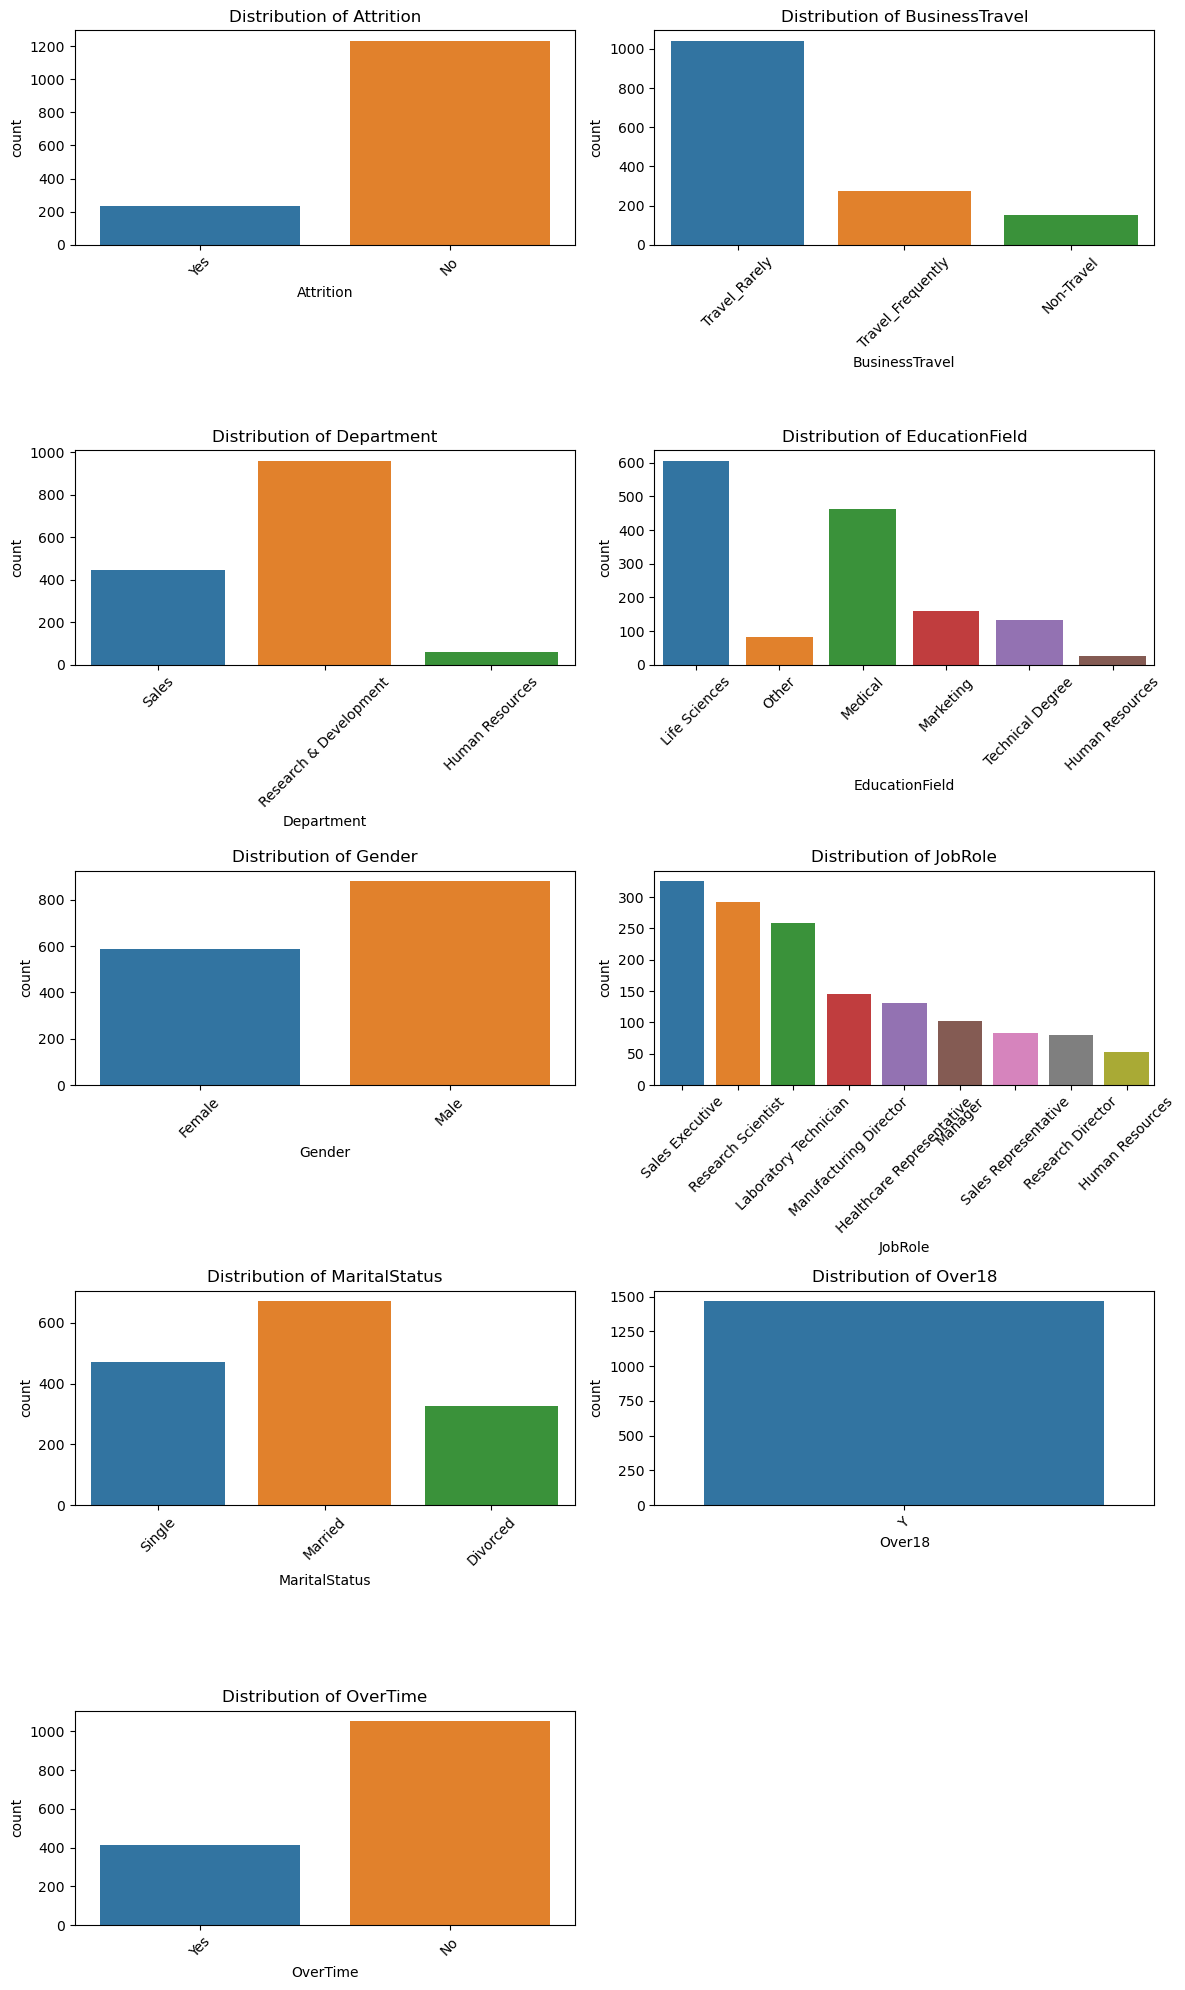

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = len(cat_columns.columns)

# Calculate the number of rows and columns for subplots
n_rows = (n_cols + 1) // 2  # Adding 1 ensures an extra row if the number of columns is odd
n_cols_display = min(n_cols, 2)  # Display only 2 columns per row

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_display, figsize=(12, n_rows*4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each categorical column and plot
for i, column in enumerate(cat_columns.columns):
    sns.countplot(x=column, data=cat_columns, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(n_cols_display * n_rows - n_cols):
    axes[-(j+1)].set_visible(False)

plt.tight_layout()
plt.show()


## Distribution of Numeric Values

<Figure size 640x480 with 0 Axes>

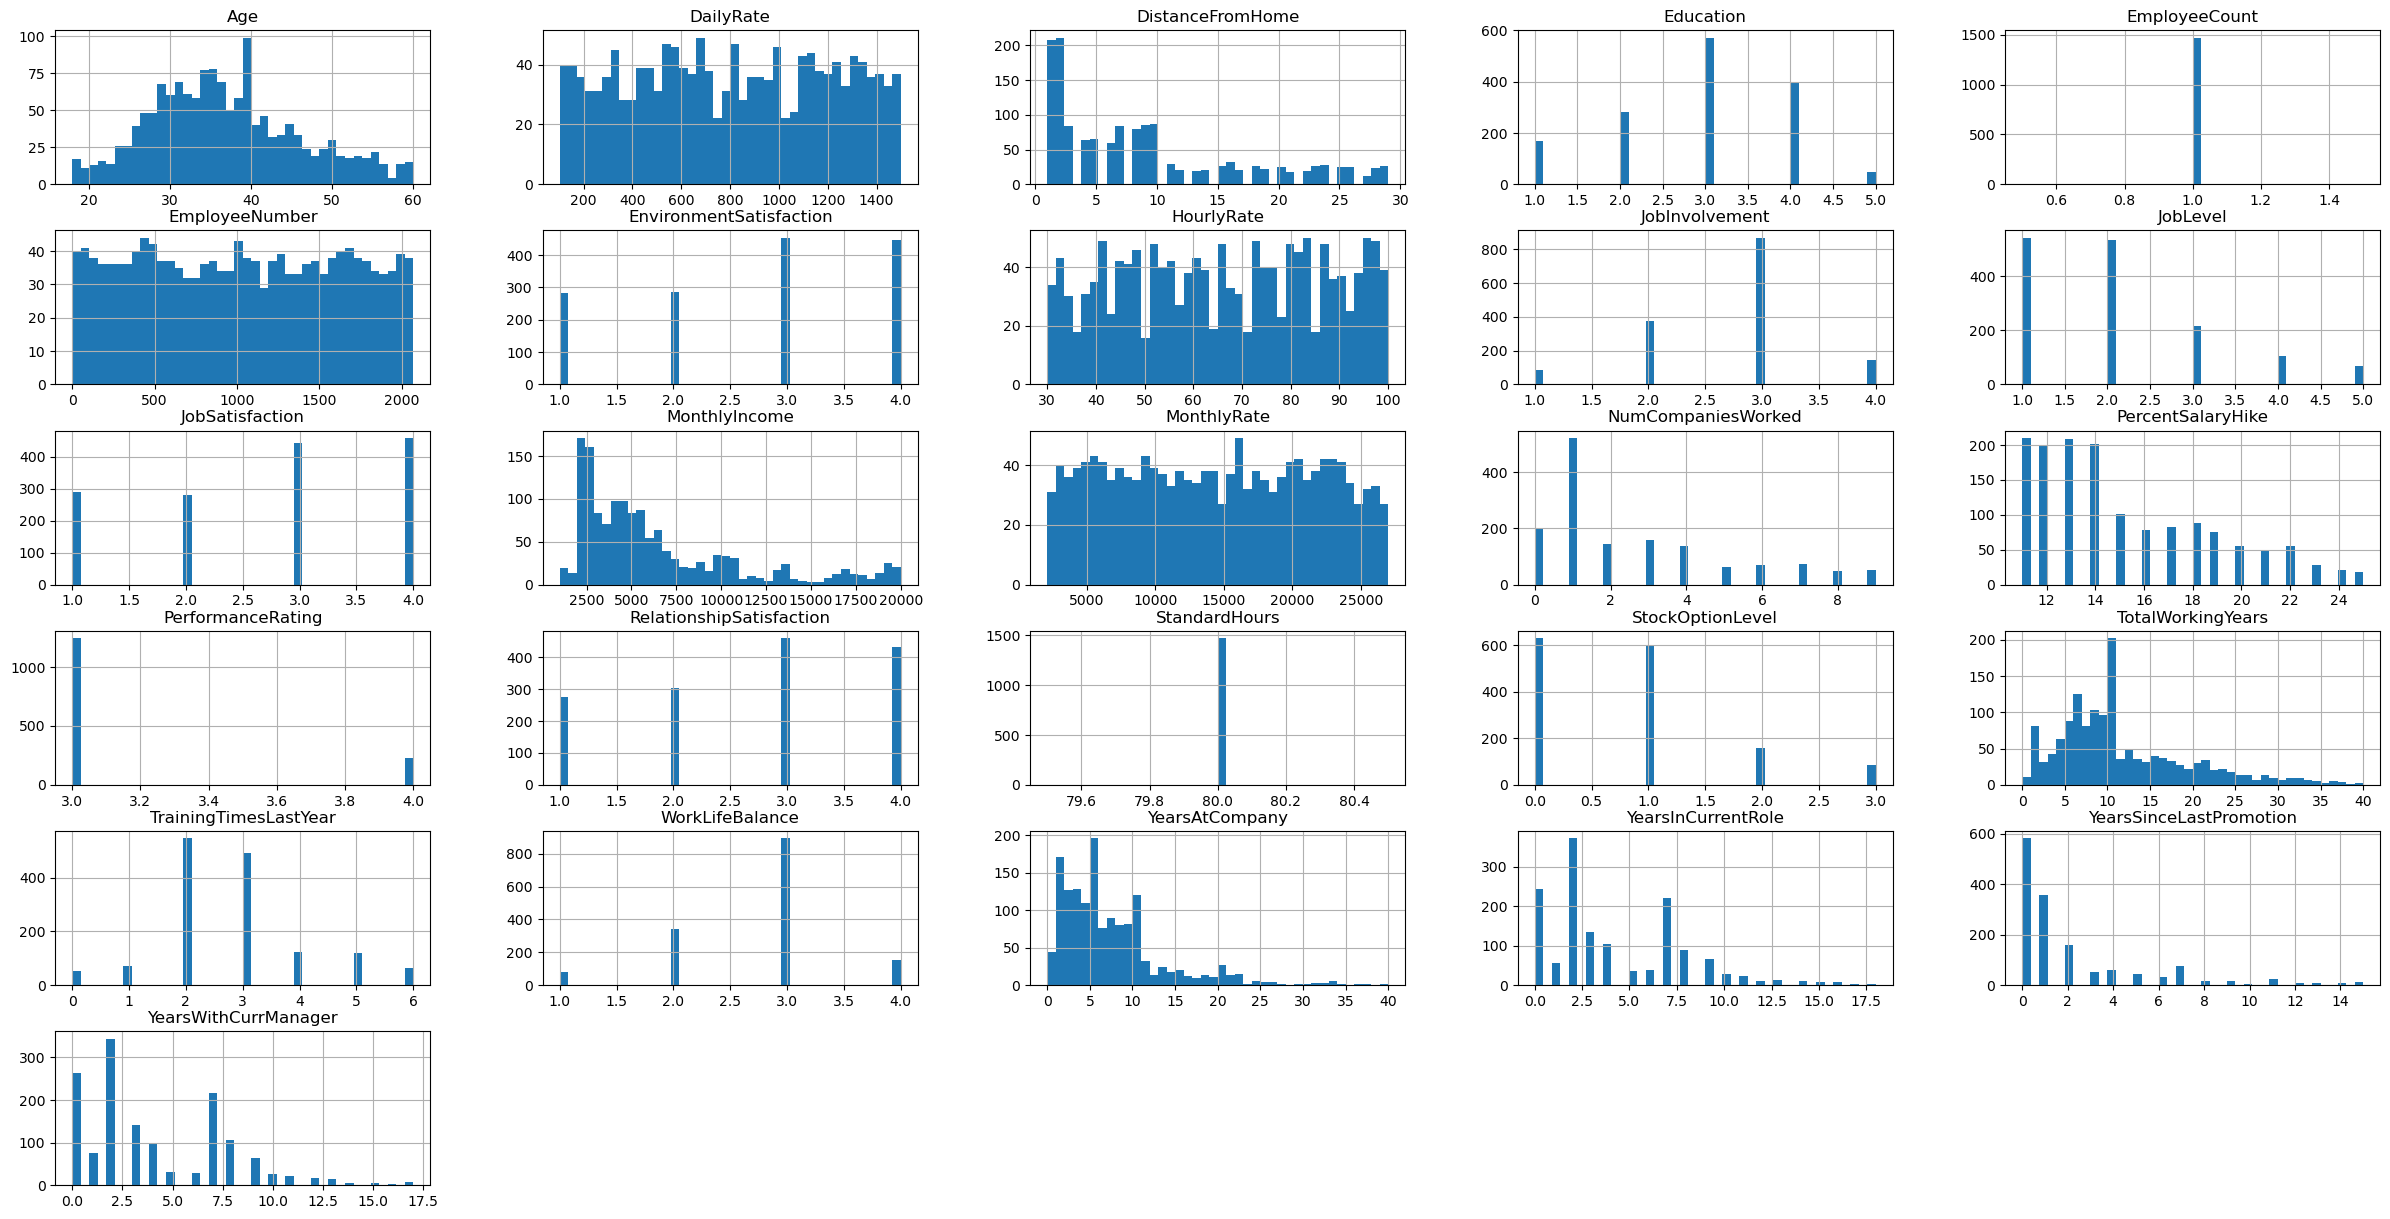

In [14]:
# distribution of numeric columns
plt.figure()
data.hist(bins=40, figsize=[30,15])
plt.show()

Insights:

1. The predominant age group of employees lies between 25 to 40 years. Beyond this age range, there's a notable decline in employee numbers.
2. A significant portion of employees reside within 10 miles of the company, indicating a preference for shorter commutes.
3. Employees holding Bachelor's and Master's degrees constitute the majority (67%).
4. Approximately 60% of employees express satisfaction with their work environment.
5. High job involvement is evident among 75% of the workforce.
6. Job satisfaction is reported by 60% of employees.
7. About one-third of the workforce has experience working with only one company.
8. Salary hikes ranging from 11% to 14% are received by 53% of employees.
9. The performance rating for 83% of employees is 3.0 (excellent), with the highest observed rating being 4.0 (outstanding), demonstrating a high level of performance across the board.
10. Stock option levels for 80% of employees are at 0.0 and 1.0, with the maximum level reported being 3.0.
11. The most common tenure range is between 5 to 10 years.
12. Two-thirds of the employees received training 2 or 3 times in the last year.
13. Work-life balance is rated as 3.0 (better) by 60% of employees, with the highest rating being 4.0 (best), reflecting a positive balance between work and personal life.
14. The majority of employees have tenures of 11 years or less within the company.
15. A downward trend in employee numbers is observed as years since the last promotion increase, with 73% receiving a promotion within the last two years.
16. Similar patterns are noted in the distribution of years in the current role and years with the current manager, pointing to parallel career progression and management experience.


## Relationship Between Categorical Variables & Target

In [15]:
# Define the target variable
target_variable = 'Attrition'

In [16]:
cat_columns = data.select_dtypes(include = ['object'])
cat_columns.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [17]:
# Get the list of categorical columns excluding the target variable
cat_columns_without_target = cat_columns.columns[cat_columns.columns != target_variable]

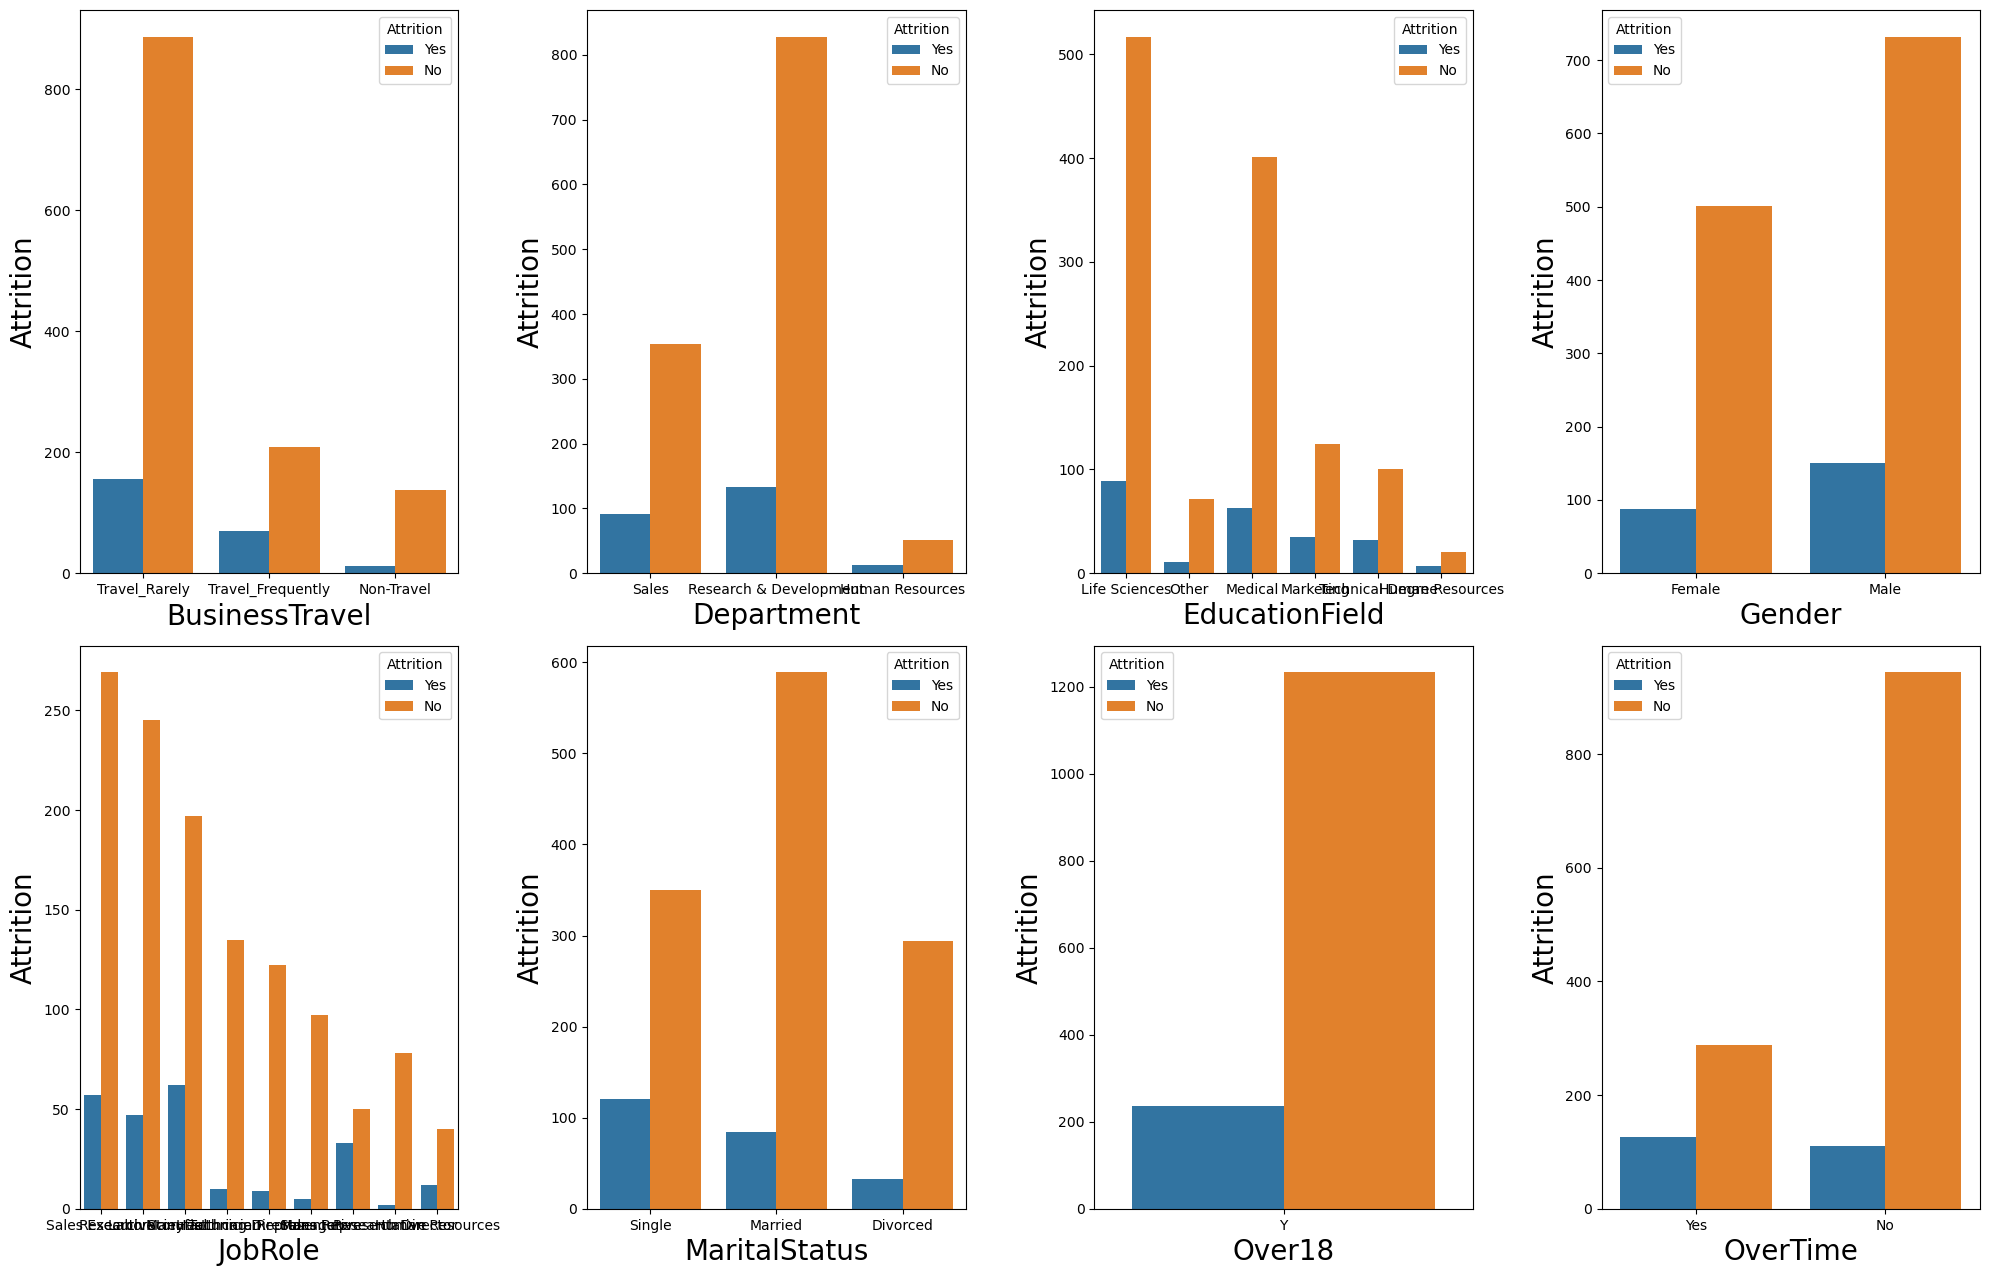

In [18]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set the canvas size
plotnumber = 1  # Initialize count variable

for column in cat_columns_without_target:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)  # Plotting 16 graphs in a 4x4 grid
        sns.countplot(x=column, hue='Attrition', data=data)
        plt.xlabel(column, fontsize=20)  # Set x-axis label with increased font size
        plt.ylabel('Attrition', fontsize=20)  # Set y-axis label with increased font size
        plotnumber += 1  # Increment the count variable

plt.tight_layout()
plt.show()

**Insights** 

1. More male employees are expected to quit their job.
2. People who travel more are more expected to leave the job.
3. People who do not do overtime do not leave the job.
4. Singles are expected to quit the job.
5. People from life science and mediacl field are more probably leaving their job.

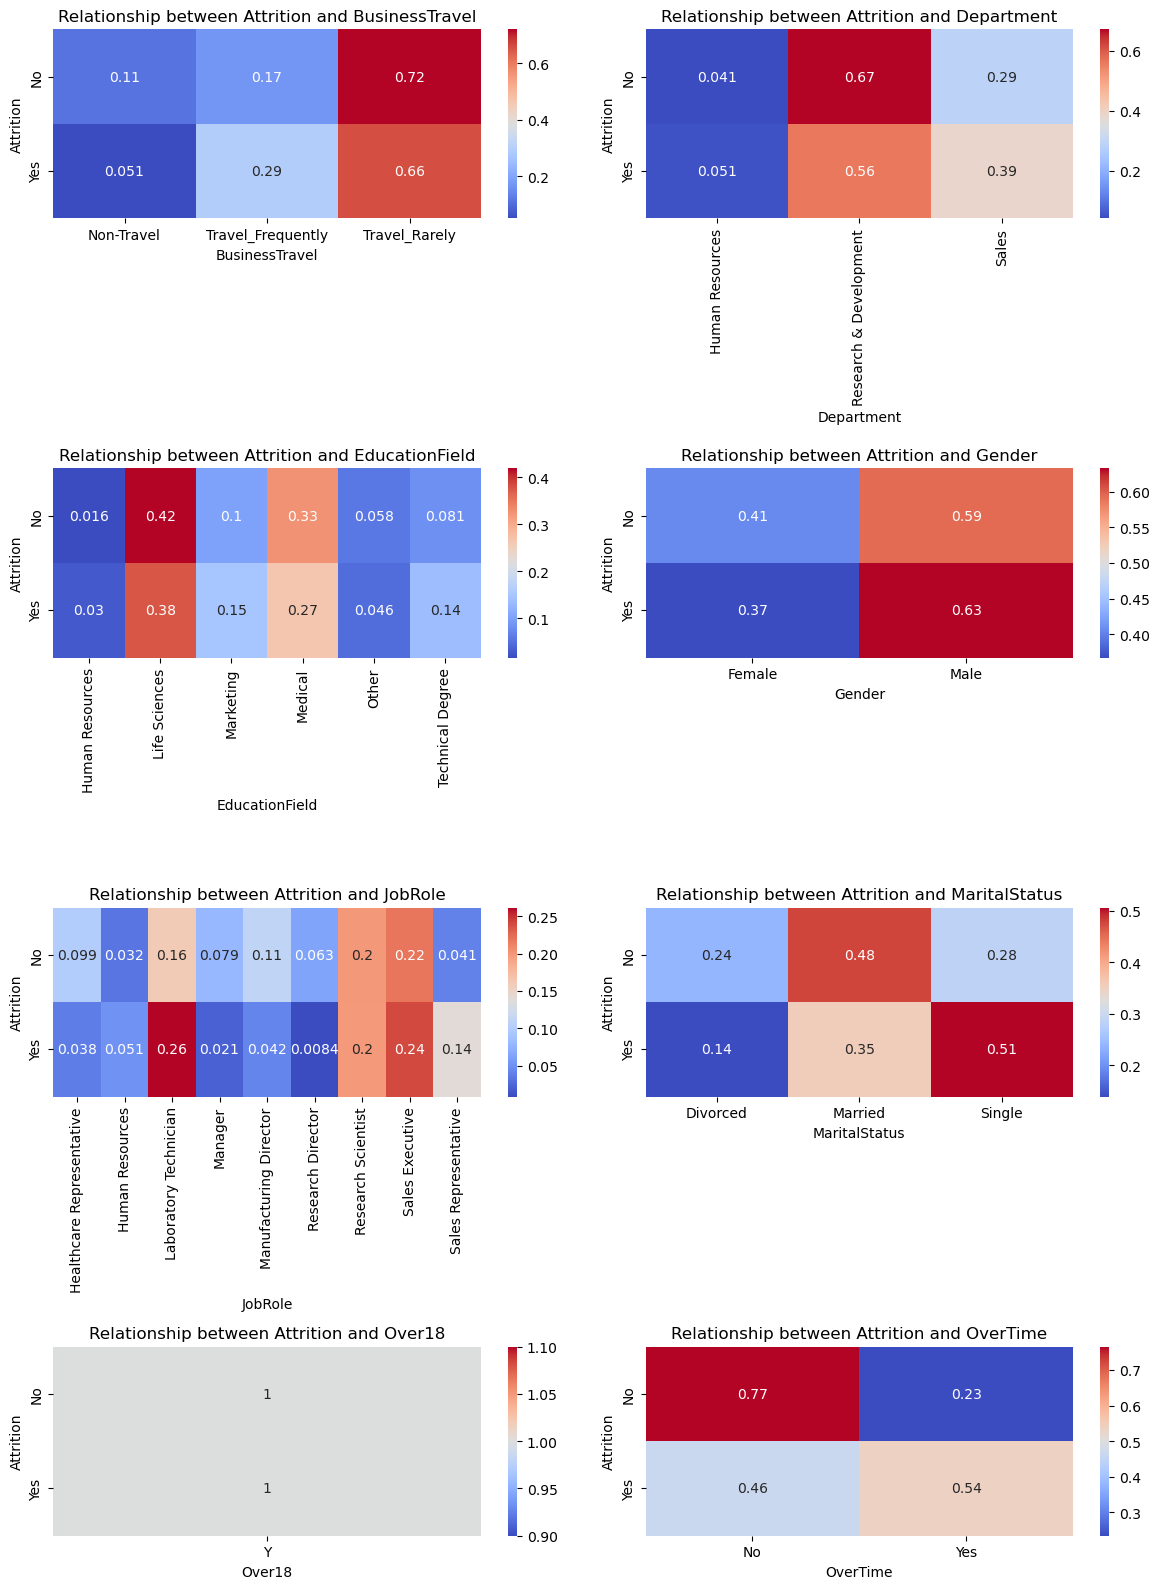

In [19]:
# Calculate the number of rows and columns for subplots
n_cols = len(cat_columns_without_target)
n_rows = (n_cols + 1) // 2  # Adding 1 ensures an extra row if the number of columns is odd
n_cols_display = min(n_cols, 2)  # Display only 2 columns per row

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_display, figsize=(12, n_rows*4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each categorical column (excluding the target variable) and plot the heatmap
for i, column in enumerate(cat_columns_without_target):
    # Create a cross-tabulation table
    ctab = pd.crosstab(cat_columns[target_variable], cat_columns[column], normalize='index')
    
    # Plot the heatmap
    sns.heatmap(ctab, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Relationship between {target_variable} and {column}')
    axes[i].set_ylabel(target_variable)
    axes[i].set_xlabel(column)

# Hide any unused axes
for j in range(n_cols_display * n_rows - n_cols):
    axes[-(j+1)].set_visible(False)

plt.tight_layout()
plt.show()


Insights:

1. 62% of laboratory technicians opt to leave the company.
2. There's a noticeable trend where employees engaging in frequent travel show a higher propensity to resign, suggesting that travel demands may impact job satisfaction.
3. Departments such as Human Resources and Sales exhibit higher attrition rates
4. Among employees with degrees, those holding qualifications in Human Resources, Marketing, and Technical fields exhibit a higher likelihood of leaving.
5. Male employees tend to resign at a higher rate compared to their female counterparts.
6. Single employees constitute 51% of the total resignations.
7. Employees who work overtime are more likely to leave their jobs.

## Box Plot of Numeric Values & Target

In [20]:
# Define the target variable
target_variable = 'Attrition'

In [21]:
# Get the list of numeric columns
num_columns = data.select_dtypes(include=['int64']).columns

In [22]:
data2=data[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]#discrete columns

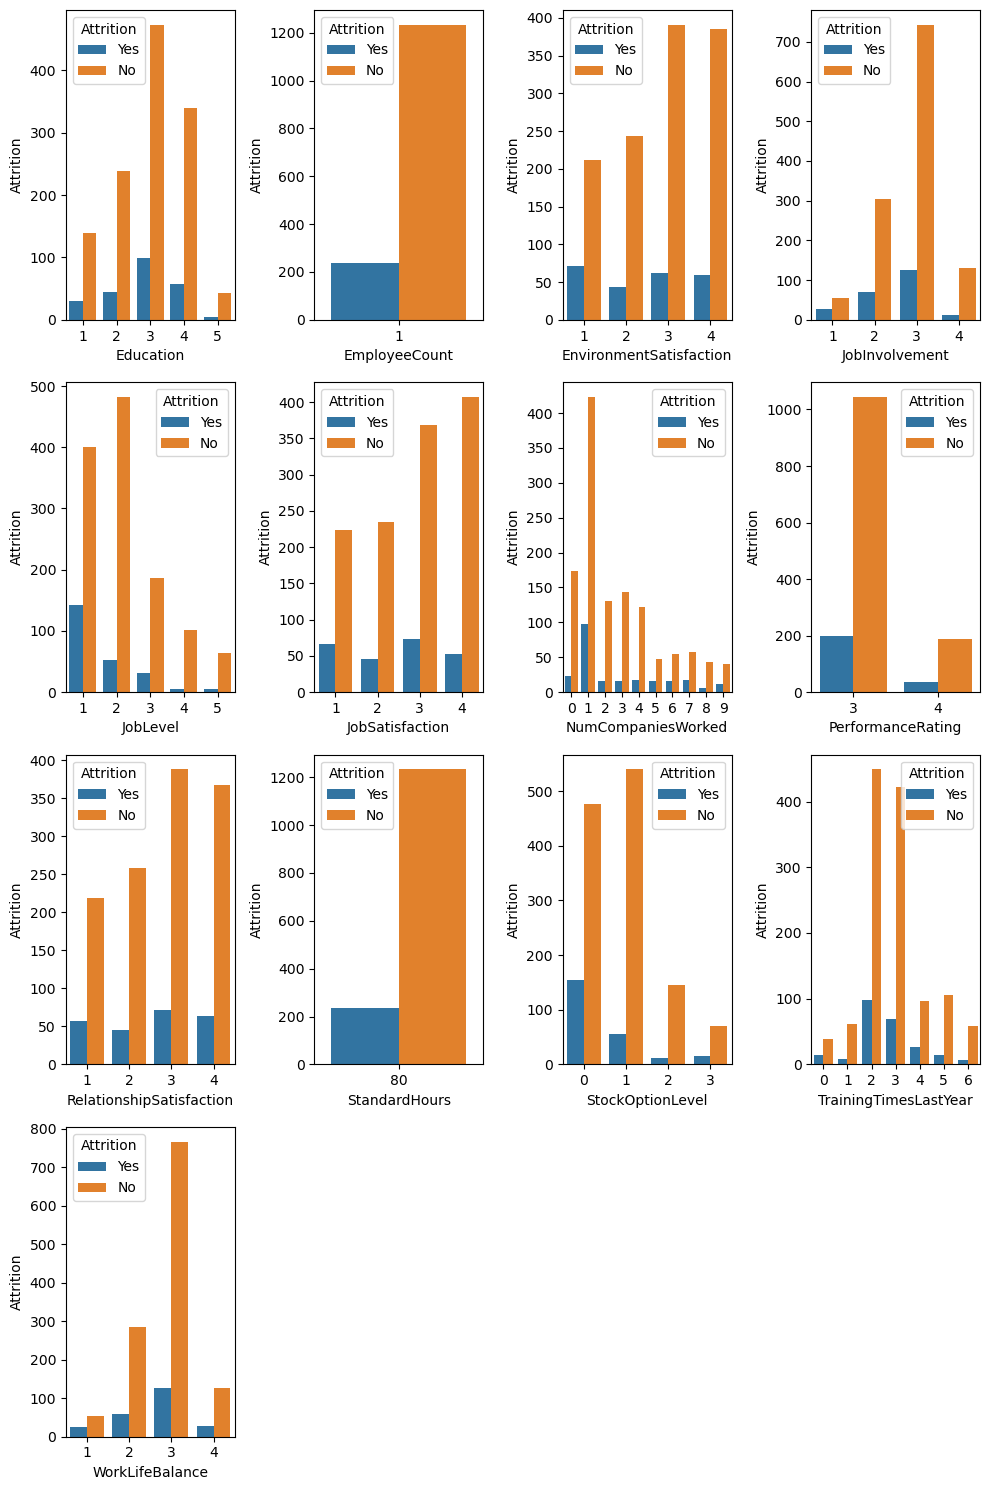

In [23]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(10,15), facecolor='white')#canvas size
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column]
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Attrition',fontsize=10)
    plotnumber+=1
plt.tight_layout()

**Insights:**
    
1. If anyone has an EnvironemntSatisfaction is 1 then they probably leave the job and have a score of 2.
2. JobInvolvement is 3 has greater probability of leaving the job.
3. Job level is less then their higher chances they can leave the job.
4. NumCompaniesWorked is 1 then they want to shift company faster than others.
5. if the performance rating is less then they will change the job.

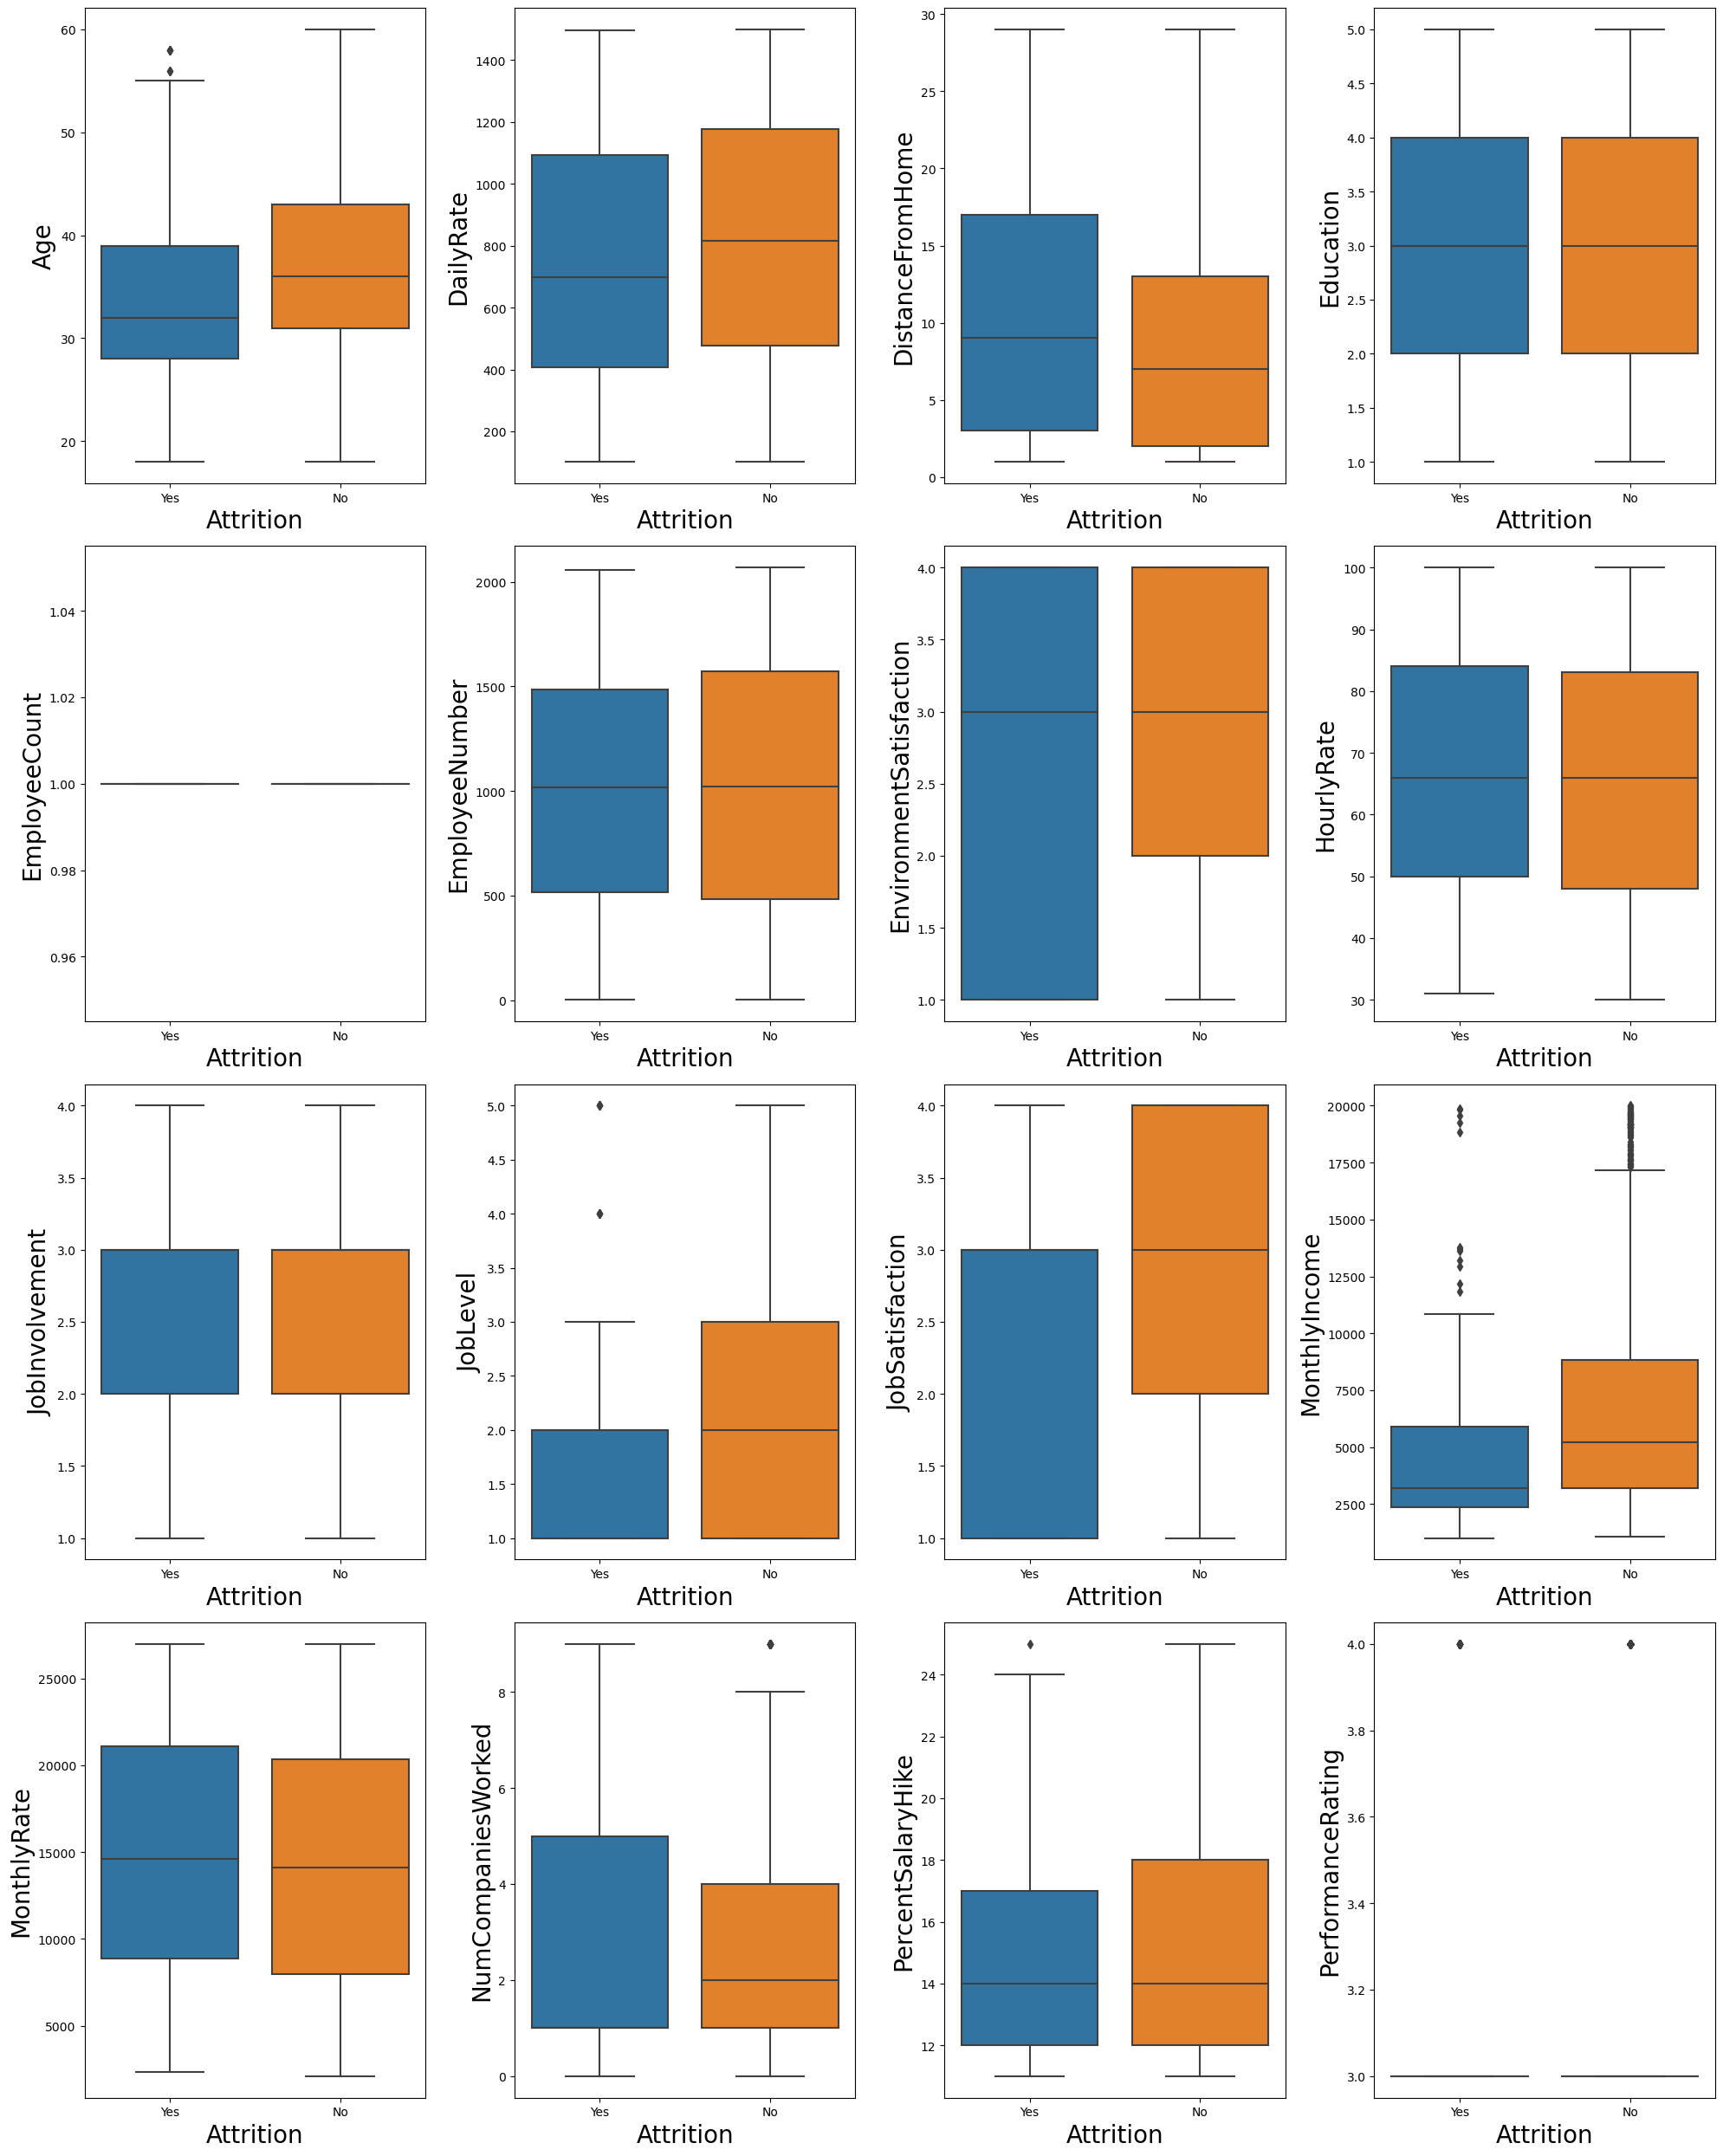

In [24]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set the canvas size
plotnumber = 1  # Initialize count variable

for column in num_columns:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)  # Plotting 16 graphs in a 4x4 grid
        sns.boxplot(x='Attrition', y=column, data=data)
        plt.xlabel(target_variable, fontsize=20)  # Set x-axis label with increased font size
        plt.ylabel(column, fontsize=20)  # Set y-axis label with increased font size
        plotnumber += 1  # Increment the count variable

plt.tight_layout()
plt.show()

Insights:

Several factors appear to contribute to increased attrition rates, including: younger age, lower income, greater distance from home, lower job level, job dissatisfaction, shorter tenure at the company (including fewer years in the current role and with the current manager, which may signal underdeveloped bonds or a lack of advancement opportunities that contribute to leaving).

## Checking For Correlation

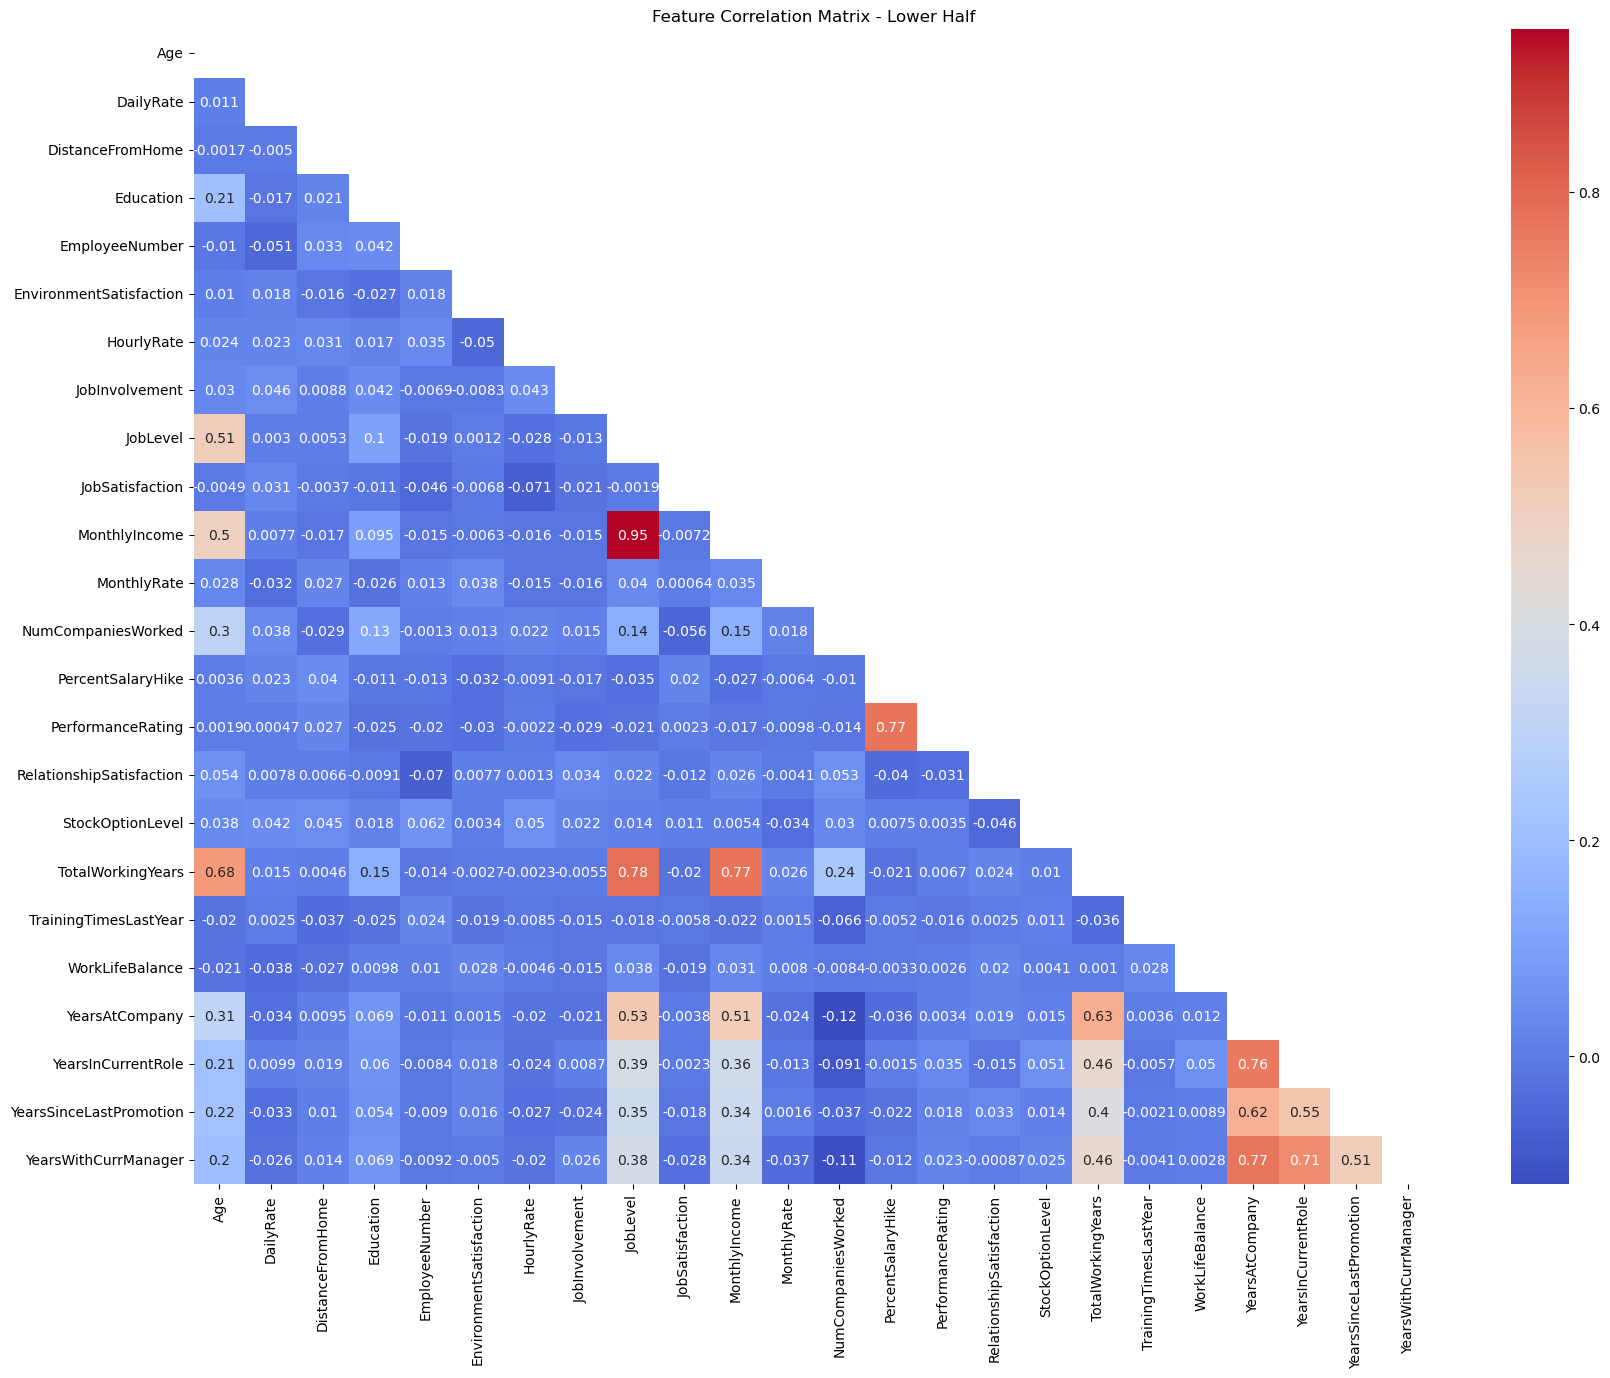

In [25]:
num_col = data.select_dtypes(include=['int64'])
num_col = num_col.drop(columns=['EmployeeCount', 'StandardHours'])
correlation_matrix = num_col.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))  # Adjust the dimensions as needed

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title("Feature Correlation Matrix - Lower Half")
plt.show()

There are high correlation between feature pairs (>= 0.6): {'MonthlyIncome', 'JobLevel'}, {'TotalWorkingYears', 'Age'}, {'PerformanceRating', 'PercentSalaryHike'}, {'TotalWorkingYears', 'JobLevel'}, {'TotalWorkingYears', 'MonthlyIncome'}, {'YearsAtCompany', 'TotalWorkingYears'}, {'YearsAtCompany', 'YearsWithCurrManager'}, {'YearsAtCompany', 'YearsSinceLastPromotion'}, {'YearsAtCompany', 'YearsInCurrentRole'}, {'YearsInCurrentRole', 'YearsWithCurrManager'}

# Data Preprocessing

## Data Cleaning

In [26]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [28]:
# checking for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [29]:
# Duplicated values
data.duplicated().sum()

0

## Label Encoding

Since the features are categorical, we need to encode them into numerical values for machine learning
models to process.

In [30]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [31]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

## Addressing Class Imbalance

In [33]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

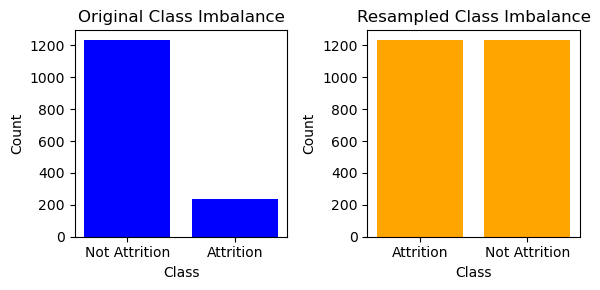

In [34]:
# Calculate class counts for the original dataset
original_class_counts = data['Attrition'].value_counts()

# Calculate class counts for the resampled dataset
resampled_class_counts = pd.Series(y_resampled).value_counts()

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

# Plotting original class imbalance
plt.bar(original_class_counts.index, original_class_counts.values, color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Original Class Imbalance')
plt.xticks(original_class_counts.index, ['Not Attrition', 'Attrition'])

# Plotting resampled class imbalance
plt.subplot(1, 2, 2)
plt.bar(resampled_class_counts.index, resampled_class_counts.values, color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Resampled Class Imbalance')
plt.xticks(resampled_class_counts.index, ['Not Attrition', 'Attrition'])

plt.tight_layout()
plt.show()


In [35]:
class_counts = data['Attrition'].value_counts()

# Print the counts
print("Number of class 0:", class_counts[0])
print("Number of class 1:", class_counts[1])

Number of class 0: 1233
Number of class 1: 237


In [36]:
class_counts = y_resampled.value_counts()

# Print the counts
print("Number of class 0:", class_counts[0])
print("Number of class 1:", class_counts[1])

Number of class 0: 1233
Number of class 1: 1233


## Feature Selection

We can use 2 different techniques for feature selection : using correlation matrix and chi2 test.

###  Using correlation matrix

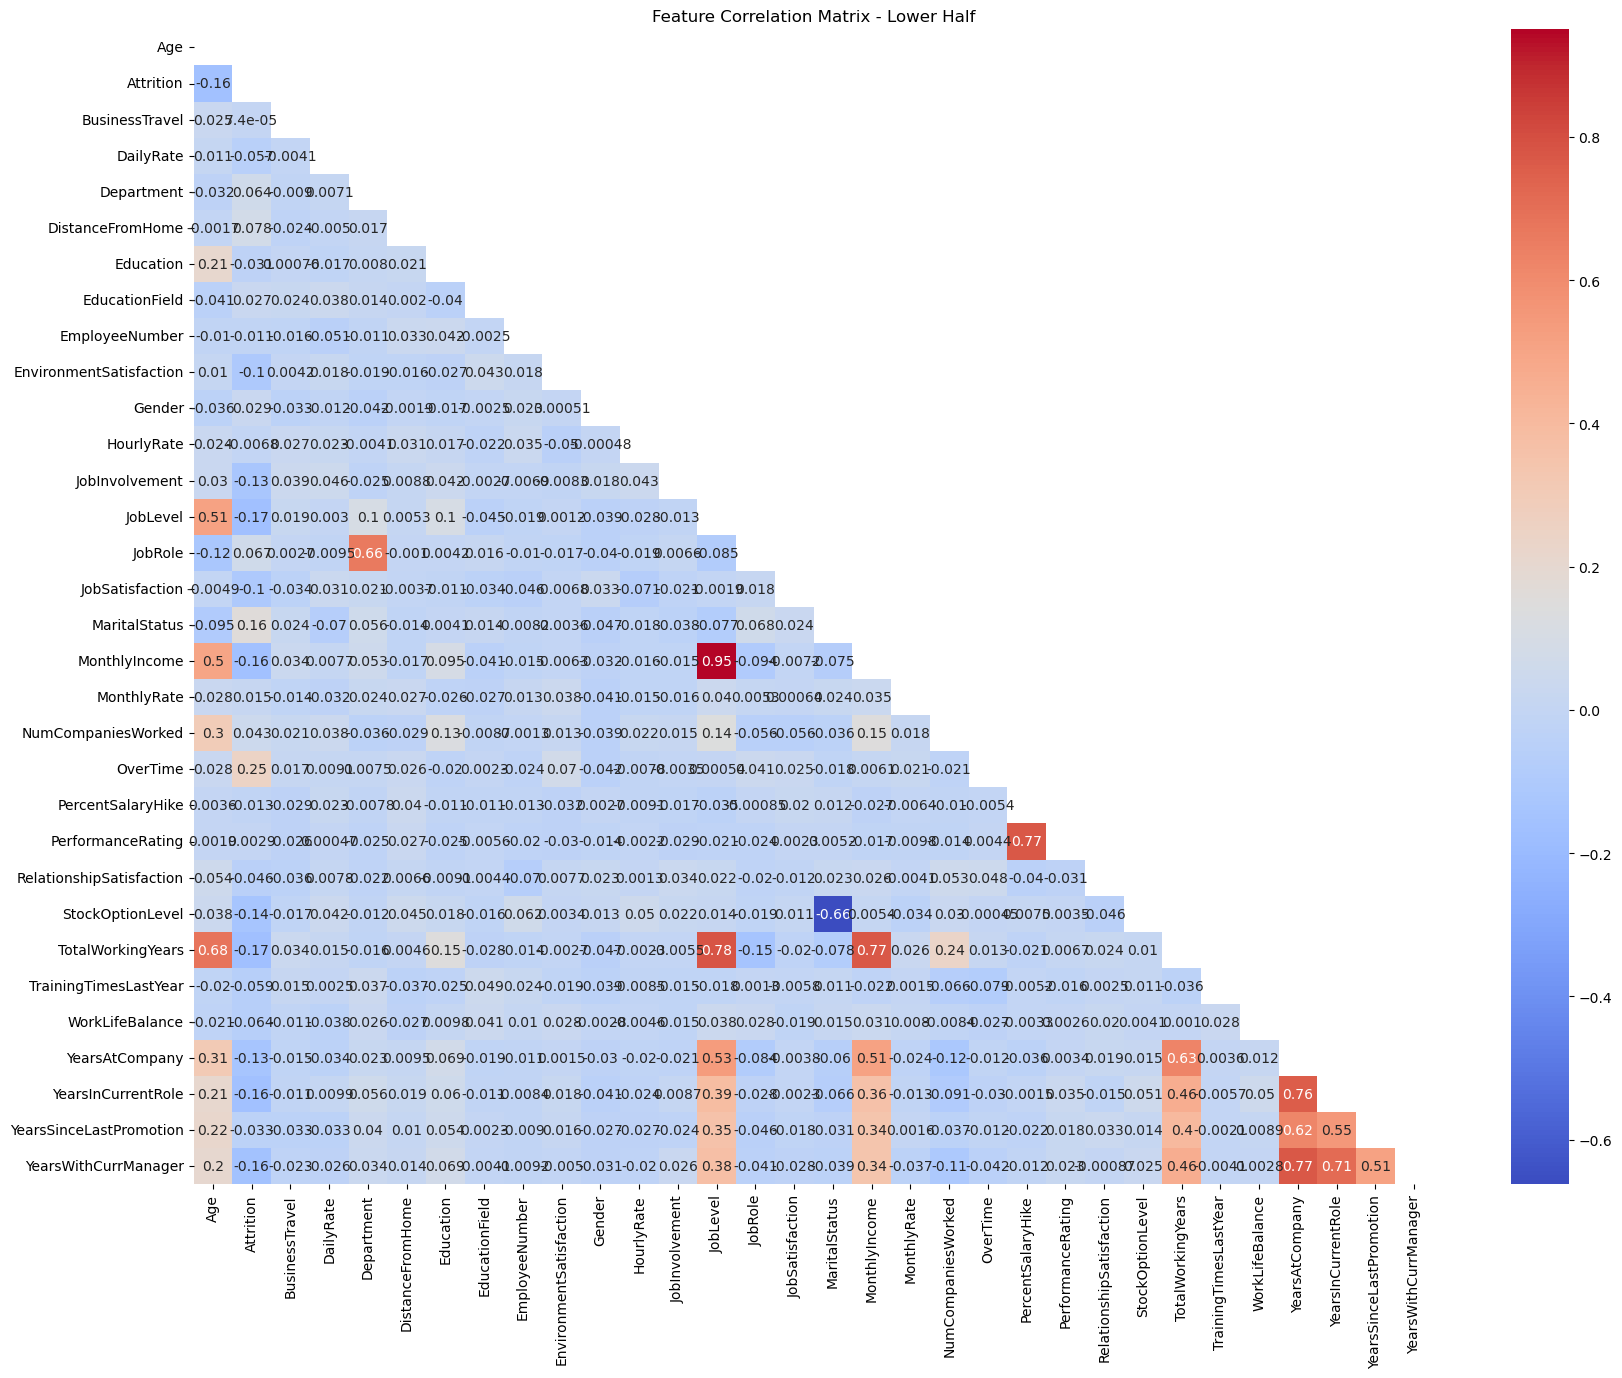

In [37]:
num_col2 = data.select_dtypes(include=['int64', 'int32'])
num_col2 = num_col2.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)
correlation_matrix_alldata = num_col2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_alldata, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))  # Adjust the dimensions as needed

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix_alldata, annot=True, cmap='coolwarm', mask=mask)
plt.title("Feature Correlation Matrix - Lower Half")
plt.show()

There are high correlation between feature pairs (>= 0.6): {'MonthlyIncome', 'JobLevel'}, {'TotalWorkingYears', 'Age'}, {'PerformanceRating', 'PercentSalaryHike'}, {'TotalWorkingYears', 'JobLevel'}, {'TotalWorkingYears', 'MonthlyIncome'}, {'YearsAtCompany', 'TotalWorkingYears'}, {'YearsAtCompany', 'YearsWithCurrManager'}, {'YearsAtCompany', 'YearsSinceLastPromotion'}, {'YearsAtCompany', 'YearsInCurrentRole'}, {'YearsInCurrentRole', 'YearsWithCurrManager'}

In [38]:
# Calculate the correlation between target variable and all feature
correlation_with_target = data.corr()['Attrition'].sort_values(ascending=False)

# Print the correlation
print(correlation_with_target)


Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

**Negative Correlations**: Features such as YearsWithCurrManager, JobInvolvement, OverTime_No, StockOptionLevel, and YearsInCurrentRole show negative correlations with attrition. This suggests that higher values in these areas (e.g., more years with the current manager, higher job involvement, not working overtime) are associated with lower attrition rates.

**Positive Correlations**: The OverTime_Yes feature, for example, shows a positive correlation with attrition, indicating that employees working overtime are more likely to leave.

In [39]:
correlation_matrix = data.corr()

# Set the threshold for high correlation
threshold = 0.5

# Find features highly correlated with the target variable
target_correlation = correlation_matrix['Attrition'].abs()
highly_correlated_target = target_correlation[target_correlation > threshold].index.tolist()

# Find features highly correlated among themselves
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_features.add(correlation_matrix.columns[i])

# Remove features highly correlated among themselves
selected_features = [col for col in data.columns if col not in highly_correlated_features]

# Keep features highly correlated with the target variable
selected_features.extend(highly_correlated_target)

selected_features.remove('Attrition')
selected_features.remove('Attrition')
selected_features.remove('Over18')

# Create a new DataFrame with selected features
selected_data = X_resampled[selected_features]
selected_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,TrainingTimesLastYear,WorkLifeBalance
0,41,2,1102,2,1,2,1,1,1,2,...,4,2,19479,8,1,11,1,80,0,1
1,49,1,279,1,8,1,1,1,2,3,...,2,1,24907,1,0,23,4,80,3,3
2,37,2,1373,1,2,2,4,1,4,4,...,3,2,2396,6,1,15,2,80,3,3
3,33,1,1392,1,3,4,1,1,5,4,...,3,1,23159,1,1,11,3,80,3,3
4,27,2,591,1,2,1,3,1,7,1,...,2,1,16632,9,0,12,4,80,3,3


Correlation Matrix Analysis: This method is useful for identifying linear relationships between numeric features and the target variable. It helps in understanding how each feature is correlated with the target, allowing you to focus on features with the strongest correlations.

### Using chi-square

In [40]:
# Number of features to select
k = 10  # Adjust this value based on your requirement

# Perform univariate feature selection using chi-square test
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features_chi = X.columns[selected_feature_indices]

# Print selected feature names
print("Selected Features:")
print(selected_features)

Selected Features:
['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [41]:
# Select only the selected features from the original DataFrame
selected_df_chi2 = X_resampled[selected_features_chi].copy()

selected_df_chi2.head()

,Age,DailyRate,DistanceFromHome,MonthlyIncome,MonthlyRate,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,1,5993,19479,1,8,6,4,5
1,49,279,8,5130,24907,0,10,10,7,7
2,37,1373,2,2090,2396,1,7,0,0,0
3,33,1392,3,2909,23159,1,8,8,7,0
4,27,591,2,3468,16632,0,6,2,2,2


Chi-square Test: This method is effective for identifying associations between categorical features and the target variable. It's useful when dealing with categorical features that have discrete values.

**Conlusion:** Among confusion matrix and chi-sqaure, we are choosing confusion matrix for feature selection because confusion matrix method is more aligned with the underlying relationships and dependencies in the data. For example, we know that certain features like WorkLifeBalance, BusinessTravel are crucial for knowing employee attrition, we prioritized method that retained those features.

# Model Training

## 1. Logistic Regession

### 1.1 Using resampled data without feature selection

In [42]:
X_train, X_testval, y_train, y_testval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.2, random_state=42)

In [43]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### 1.1.1 Checking overfitting

In [44]:
#prediction with x_train
y_train_lr = lr_model.predict(X_train)

# prediction with x_val
y_val_lr = lr_model.predict(X_val)

# prediction with x_test
y_test_lr = lr_model.predict(X_test)

# training accuracy
print(accuracy_score(y_train,y_train_lr))

# validation accuracy
print(accuracy_score(y_val,y_val_lr))

# testing accuracy
print(accuracy_score(y_test,y_test_lr))

0.8154158215010142
0.8383838383838383
0.7822784810126582


The training accuracy is slightly higher than the testing accuracy, but the difference is not substantial. This indicates that the model is performing slightly better on the training data compared to the testing data, which suggests a mild case of overfitting. However, the difference between the training and testing accuracies is not significant, so the model's performance is relatively consistent across the training and testing datasets.

#### 1.1.2 Model Evaluation

In [45]:
accuracy_lr = accuracy_score(y_test, y_test_lr)
precision_lr = precision_score(y_test, y_test_lr)
recall_lr = recall_score(y_test, y_test_lr)
f1_lr = f1_score(y_test, y_test_lr)

print('Test accuracy =', accuracy_lr)
print('Precision = ',precision_lr)
print('Recall = ',recall_lr)
print('f1_score = ',f1_lr)

# Classification report
print("\nClassification Report on df:\n", classification_report(y_test, y_test_lr))

Test accuracy = 0.7822784810126582
Precision =  0.7512437810945274
Recall =  0.8074866310160428
f1_score =  0.7783505154639175

Classification Report on df:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       208
           1       0.75      0.81      0.78       187

    accuracy                           0.78       395
   macro avg       0.78      0.78      0.78       395
weighted avg       0.78      0.78      0.78       395



### 1.2 Using feature selection by confusion matrix

In [46]:
X_train, X_testval, y_train, y_testval = train_test_split(selected_data, y_resampled, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.2, random_state=42)

In [47]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### 1.2.1 Checking overfitting

In [48]:
#prediction with x_train
y_train_lr_conf = lr_model.predict(X_train)

# prediction with x_val
y_val_lr_conf = lr_model.predict(X_val)

# prediction with x_test
y_test_lr_conf = lr_model.predict(X_test)

# training accuracy
print(accuracy_score(y_train,y_train_lr_conf))

# validation accuracy
print(accuracy_score(y_val,y_val_lr_conf))

# testing accuracy
print(accuracy_score(y_test,y_test_lr_conf))

0.7748478701825557
0.8383838383838383
0.7518987341772152


#### 1.2.2 Model evaluation

In [49]:
accuracy_lr_conf = accuracy_score(y_test, y_test_lr_conf)
precision_lr_conf = precision_score(y_test, y_test_lr_conf)
recall_lr_conf = recall_score(y_test, y_test_lr_conf)
f1_lr_conf = f1_score(y_test, y_test_lr_conf)

print('Test accuracy =', accuracy_lr_conf)
print('Precision = ',precision_lr_conf)
print('Recall = ',recall_lr_conf)
print('f1_score = ',f1_lr_conf)

# Classification report
print("\nClassification Report on df:\n", classification_report(y_test, y_test_lr))

Test accuracy = 0.7518987341772152
Precision =  0.7431693989071039
Recall =  0.7272727272727273
f1_score =  0.7351351351351352

Classification Report on df:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       208
           1       0.75      0.81      0.78       187

    accuracy                           0.78       395
   macro avg       0.78      0.78      0.78       395
weighted avg       0.78      0.78      0.78       395



The training accuracy is slightly higher than the testing accuracy, but the difference is not substantial. This indicates that the model is performing slightly better on the training data compared to the testing data, which suggests a mild case of overfitting. However, the difference between the training and testing accuracies is not significant, so the model's performance is relatively consistent across the training and testing datasets.

### 1.3 Visualization

In [50]:
data = {
    'Metric': ['Precision', 'Recall', 'Test Accuracy', 'F1 Score'],
    'Without Feature Selection': [precision_lr, recall_lr, accuracy_lr, f1_lr],
    'With Feature Selection': [precision_lr_conf, recall_lr_conf, accuracy_lr_conf, f1_lr_conf]
}

metrics_df = pd.DataFrame(data)
metrics_df.set_index('Metric', inplace=True)
print(metrics_df)

               Without Feature Selection  With Feature Selection
Metric                                                          
Precision                       0.751244                0.743169
Recall                          0.807487                0.727273
Test Accuracy                   0.782278                0.751899
F1 Score                        0.778351                0.735135


#### 1.3.1 Grouped Bar Chart

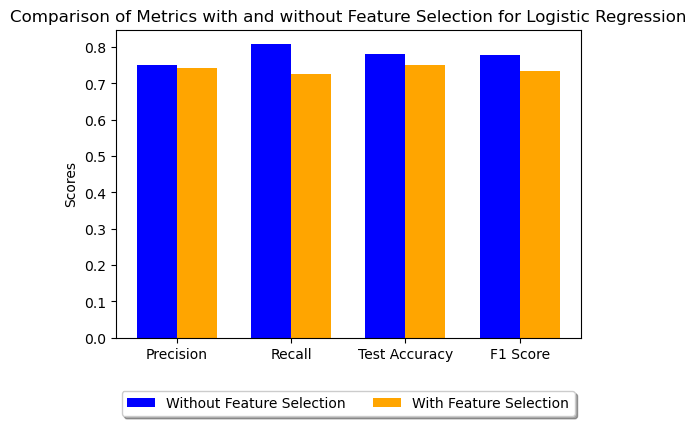

In [51]:
metrics = ['Precision', 'Recall', 'Test Accuracy', 'F1 Score']
lr_metrics_no_selection = [precision_lr, recall_lr, accuracy_lr, f1_lr]
lr_metrics_with_selection = [precision_lr_conf, recall_lr_conf, accuracy_lr_conf, f1_lr_conf]

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting bars for LR without feature selection
bars1 = ax.bar(ind, lr_metrics_no_selection, width, color='blue', label='Without Feature Selection')

# Plotting bars for LR with feature selection
bars2 = ax.bar(ind + width, lr_metrics_with_selection, width, color='orange', label='With Feature Selection')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics with and without Feature Selection for Logistic Regression')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(metrics)
ax.legend()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.show()

#### 1.3.2 Radar Chart

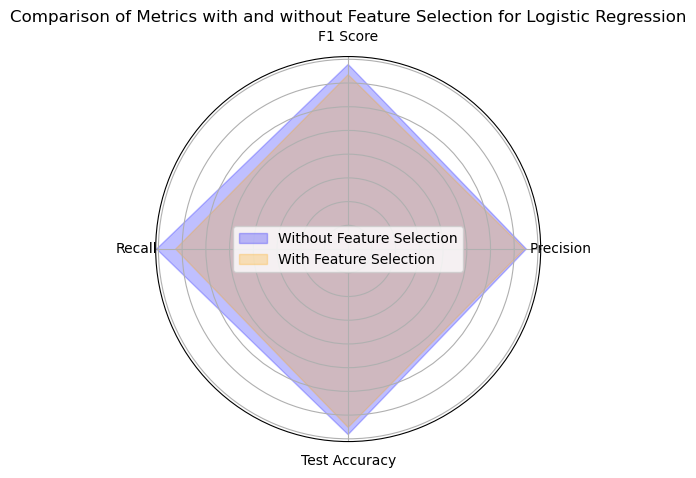

In [52]:
# Define the metrics and their values for LR without and with feature selection
metrics = ['Precision', 'F1 Score', 'Recall', 'Test Accuracy']
lr_metrics_no_selection = [precision_lr,  f1_lr, recall_lr, accuracy_lr]
lr_metrics_with_selection = [precision_lr_conf, f1_lr_conf, recall_lr_conf, accuracy_lr_conf]

# Define the number of metrics and the angles for the radar chart
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Repeat the first metric to close the circle
lr_metrics_no_selection += lr_metrics_no_selection[:1]
lr_metrics_with_selection += lr_metrics_with_selection[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.fill(angles, lr_metrics_no_selection, color='blue', alpha=0.25, label='Without Feature Selection')
ax.fill(angles, lr_metrics_with_selection, color='orange', alpha=0.25, label='With Feature Selection')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Comparison of Metrics with and without Feature Selection for Logistic Regression')
ax.legend()
plt.show()

Here, logictic regression worked better on resampled data without class imbalance and feature selection. Thus we selected the model applied on resampled dataset without feature selection

## 2. Random Forest

### 2.1 Using resampled data without feature selection

In [53]:
X_train, X_testval, y_train, y_testval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.2, random_state=42)

In [54]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 2.1.1 Checking Overfittng

In [55]:
#prediction with x_train
y_train_rf = rf_model.predict(X_train)

# prediction with x_val
y_val_rf = rf_model.predict(X_val)

# prediction with x_test
y_test_rf = rf_model.predict(X_test)

# training accuracy
print(accuracy_score(y_train,y_train_rf))

# validation accuracy
print(accuracy_score(y_val,y_val_rf))

# testing accuracy
print(accuracy_score(y_test,y_test_rf))

1.0
0.9494949494949495
0.9012658227848102


#### 2.1.2 Model Evaluation

In [56]:
accuracy_rf = accuracy_score(y_test, y_test_rf)
precision_rf = precision_score(y_test, y_test_rf)
recall_rf = recall_score(y_test, y_test_rf)
f1_rf = f1_score(y_test, y_test_rf)

print('Test accuracy =', accuracy_rf)
print('Precision = ',precision_rf)
print('Recall = ',recall_rf)
print('f1_score = ',f1_rf)

# Classification report
print("\nClassification Report on df:\n", classification_report(y_test, y_test_rf))

Test accuracy = 0.9012658227848102
Precision =  0.9021739130434783
Recall =  0.8877005347593583
f1_score =  0.894878706199461

Classification Report on df:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       208
           1       0.90      0.89      0.89       187

    accuracy                           0.90       395
   macro avg       0.90      0.90      0.90       395
weighted avg       0.90      0.90      0.90       395



The model's high accuracy, precision, recall, and F1-score on the testing data suggest strong generalization. Additionally, the discrepancy between training and testing accuracies is not substantial, indicating adequate model performance without significant overfitting.

### 2.2 Using feature selection by confusion matrix

In [57]:
X_train, X_testval, y_train, y_testval = train_test_split(selected_data, y_resampled, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.2, random_state=42)

In [58]:
model_rf_conf = RandomForestClassifier(random_state=42)
model_rf_conf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 2.2.1 Checking Overfitting

In [59]:
# Prediction with x_train
y_train_rf_conf = model_rf_conf.predict(X_train)

# Prediction with x_val
y_val_rf_conf = model_rf_conf.predict(X_val)

# Prediction with x_test
y_test_rf_conf = model_rf_conf.predict(X_test)

# Training accuracy
print(accuracy_score(y_train, y_train_rf_conf))

# Validation accuracy
print(accuracy_score(y_val, y_val_rf_conf))

# Testing accuracy
print(accuracy_score(y_test, y_test_rf_conf))

1.0
0.9191919191919192
0.8860759493670886


#### 2.2.2 Model Evaluation

In [60]:
# Calculate evaluation metrics
accuracy_rf_conf = accuracy_score(y_test, y_test_rf_conf)
precision_rf_conf = precision_score(y_test, y_test_rf_conf)
recall_rf_conf = recall_score(y_test, y_test_rf_conf)
f1_rf_conf = f1_score(y_test, y_test_rf_conf)

# Print evaluation metrics
print('Test accuracy =', accuracy_rf_conf)
print('Precision = ', precision_rf_conf)
print('Recall = ', recall_rf_conf)
print('F1_score = ', f1_rf_conf)

# Classification report
print("\nClassification Report on df:\n", classification_report(y_test, y_test_rf_conf))


Test accuracy = 0.8860759493670886
Precision =  0.8776595744680851
Recall =  0.8823529411764706
F1_score =  0.88

Classification Report on df:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       208
           1       0.88      0.88      0.88       187

    accuracy                           0.89       395
   macro avg       0.89      0.89      0.89       395
weighted avg       0.89      0.89      0.89       395



The training accuracy is perfect, indicating the model has memorized the training data, which suggests overfitting. However, the validation and test accuracies are slightly lower but still relatively high, suggesting generalization. The precision, recall, and F1-score on the test set are also high and relatively balanced, indicating good performance without significant overfitting.

### 2.3 Visualization

In [61]:
data_rf = {
    'Metric': ['Precision', 'Recall', 'Test Accuracy', 'F1 Score'],
    'Without Feature Selection': [precision_rf, recall_rf, accuracy_rf, f1_rf],
    'With Feature Selection': [precision_rf_conf, recall_rf_conf, accuracy_rf_conf, f1_rf_conf]
}

# Create DataFrame
metrics_df_rf = pd.DataFrame(data_rf)
metrics_df_rf.set_index('Metric', inplace=True)
print(metrics_df_rf)

               Without Feature Selection  With Feature Selection
Metric                                                          
Precision                       0.902174                0.877660
Recall                          0.887701                0.882353
Test Accuracy                   0.901266                0.886076
F1 Score                        0.894879                0.880000


#### 2.3.1 Grouped Bar Chart

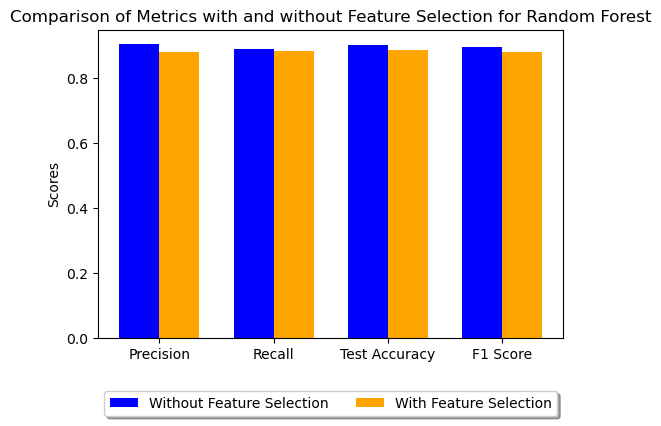

In [62]:
metrics = ['Precision', 'Recall', 'Test Accuracy', 'F1 Score']
rf_metrics_no_selection = [precision_rf, recall_rf, accuracy_rf, f1_rf]
rf_metrics_with_selection = [precision_rf_conf, recall_rf_conf, accuracy_rf_conf, f1_rf_conf]

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting bars for RF without feature selection
bars1 = ax.bar(ind, rf_metrics_no_selection, width, color='blue', label='Without Feature Selection')

# Plotting bars for RF with feature selection
bars2 = ax.bar(ind + width, rf_metrics_with_selection, width, color='orange', label='With Feature Selection')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics with and without Feature Selection for Random Forest')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(metrics)
ax.legend()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.show()

#### 2.3.2 Radar Chart

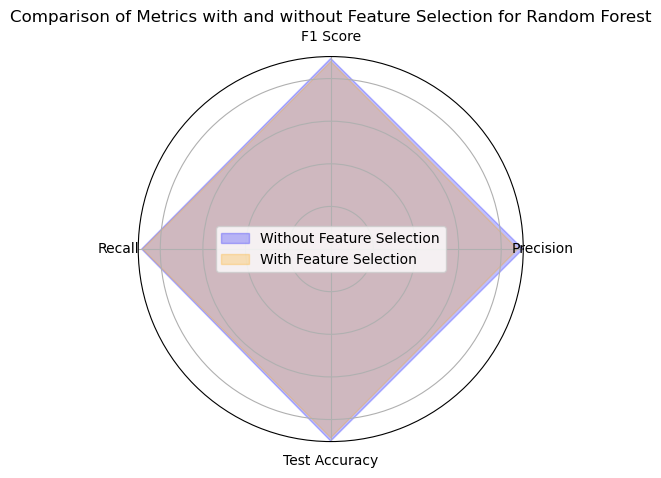

In [63]:
metrics = ['Precision', 'F1 Score', 'Recall', 'Test Accuracy']
rf_metrics_no_selection = [precision_rf, f1_rf, recall_rf, accuracy_rf]
rf_metrics_with_selection = [precision_rf_conf, f1_rf_conf, recall_rf_conf, accuracy_rf_conf]

# Define the number of metrics and the angles for the radar chart
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Repeat the first metric to close the circle
rf_metrics_no_selection += rf_metrics_no_selection[:1]
rf_metrics_with_selection += rf_metrics_with_selection[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.fill(angles, rf_metrics_no_selection, color='blue', alpha=0.25, label='Without Feature Selection')
ax.fill(angles, rf_metrics_with_selection, color='orange', alpha=0.25, label='With Feature Selection')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Comparison of Metrics with and without Feature Selection for Random Forest')
ax.legend()
plt.show()

Based on the results, test accuracy and f1 score of Random Forest on resampled dataset with feature selection through confusion matrix is slightly better. Thus, in case of Random Forest model we are selecting resampled dataset with feature selection.

## 3. Decision Tree

### 3.1 Using resampled data without feature selection

In [158]:
X_train, X_testval, y_train, y_testval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.2, random_state=42)

In [159]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 3.1.1 Checking overfitting

In [160]:
#prediction with x_train
y_train_dt = dt_model.predict(X_train)

# prediction with x_val
y_val_dt = dt_model.predict(X_val)

# prediction with x_test
y_test_dt = dt_model.predict(X_test)

# training accuracy
train_accuracy_dt = accuracy_score(y_train,y_train_dt)
print('Train accuracy:', train_accuracy_dt)

# validation accuracy
val_accuracy_dt = accuracy_score(y_val,y_val_dt)
print('Validation accuracy:',val_accuracy_dt )

# testing accuracy
test_accuracy_dt = accuracy_score(y_test,y_test_dt)
print('Test accuracy: ',test_accuracy_dt)

Train accuracy: 1.0
Validation accuracy: 0.7777777777777778
Test accuracy:  0.7949367088607595


Based on the provided accuracy scores, it appears that the decision tree model without hyperparameter tuning achieved a perfect accuracy of 1.0 on the training data, while its accuracy on the validation and test sets is noticeably lower. This large disparity between the training accuracy and the validation/test accuracies suggests overfitting.

In [161]:
accuracy_dt = accuracy_score(y_test, y_test_dt)
precision_dt = precision_score(y_test, y_test_dt)
recall_dt = recall_score(y_test, y_test_dt)
f1_dt = f1_score(y_test, y_test_dt)

print('Test accuracy =', accuracy_dt)
print('Precision = ',precision_dt)
print('Recall = ',recall_dt)
print('f1_score = ',f1_dt)

# Classification report
print("\nClassification Report on df:\n", classification_report(y_test, y_test_dt))

Test accuracy = 0.7949367088607595
Precision =  0.7476635514018691
Recall =  0.8556149732620321
f1_score =  0.7980049875311721

Classification Report on df:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       208
           1       0.75      0.86      0.80       187

    accuracy                           0.79       395
   macro avg       0.80      0.80      0.79       395
weighted avg       0.80      0.79      0.79       395



We can see that model is overfitting beacause training score is very high and testing score is less.
To overcome overfitting we do hyperparmeter tunning

#### 3.1.2 Hyper-parameter tuning

In [186]:
# Define the parameter grid
'''params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 20)),
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(1, 20)),
}'''

params = {
    "criterion": ["gini"],  # Using entropy criterion
    "splitter": ["best"],      # Using best splitter
    "max_depth": list(range(1, 13)),  # Reducing max depth
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(5, 20)),  # Increasing min samples per leaf
}

# Create the base Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=3)

# Perform GridSearchCV
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)

# Get the best parameters
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

# Use the best parameters to create a new Decision Tree classifier
model_dt_ht = DecisionTreeClassifier(**best_params)
model_dt_ht.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(max_depth=8, min_samples_leaf=9)

In [187]:
# Make predictions
y_train_dt_ht = model_dt_ht.predict(X_train)
y_val_dt_ht = model_dt_ht.predict(X_val)
y_test_dt_ht = model_dt_ht.predict(X_test)

# Evaluate the model
train_accuracy_dt_ht = accuracy_score(y_train, y_train_dt_ht)
val_accuracy_dt_ht = accuracy_score(y_val, y_val_dt_ht)
test_accuracy_dt_ht = accuracy_score(y_test, y_test_dt_ht)

precision_dt_ht = precision_score(y_test, y_test_dt_ht)
recall_dt_ht = recall_score(y_test, y_test_dt_ht)
f1_dt_ht = f1_score(y_test, y_test_dt_ht)

print("Train Accuracy:", train_accuracy_dt_ht)
print("Validation Accuracy:", val_accuracy_dt_ht)
print("Test Accuracy:", test_accuracy_dt_ht)
print()
print("Precision:", precision_dt_ht)
print("Recall:", recall_dt_ht)
print("F1 Score:", f1_dt_ht)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_dt_ht))

Train Accuracy: 0.8706896551724138
Validation Accuracy: 0.7777777777777778
Test Accuracy: 0.7544303797468355

Precision: 0.7295918367346939
Recall: 0.7647058823529411
F1 Score: 0.7467362924281984

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       208
           1       0.73      0.76      0.75       187

    accuracy                           0.75       395
   macro avg       0.75      0.75      0.75       395
weighted avg       0.76      0.75      0.75       395



#### 3.1.3 Visualization of Decision Tree without and with Hyperparameter tuning

#### Difference between Train, Validation and Test accuracy of decision tree with and without hypermeter tuning

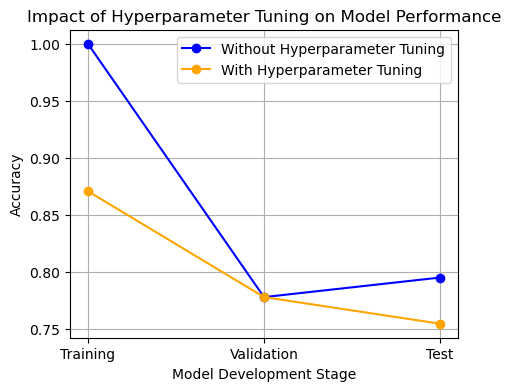

In [188]:
# Define the stages of model development
stages = ['Training', 'Validation', 'Test']

# Define the accuracy scores for decision tree without hyperparameter tuning
accuracy_no_tuning = [train_accuracy_dt, val_accuracy_dt, test_accuracy_dt]

# Define the accuracy scores for decision tree with hyperparameter tuning
accuracy_with_tuning = [train_accuracy_dt_ht, val_accuracy_dt_ht, test_accuracy_dt_ht]

# Define the x-axis labels
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']

# Plot the line plot
plt.figure(figsize=(5, 4))
plt.plot(stages, accuracy_no_tuning, marker='o', label='Without Hyperparameter Tuning', color='blue')
plt.plot(stages, accuracy_with_tuning, marker='o', label='With Hyperparameter Tuning', color='orange')
plt.xlabel('Model Development Stage')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Tuning on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

The comparison between the decision tree model without and with hyperparameter tuning reveals significant insights regarding overfitting. Without tuning, the model achieves perfect accuracy on the training data, indicative of overfitting, as it fails to generalize well to unseen data, as evidenced by lower validation and test accuracies. However, with hyperparameter tuning, the training accuracy had significant decreas and the model's performance on the validation sets improves, suggesting reduced overfitting and better generalization. This underscores the importance of hyperparameter tuning in mitigating overfitting and enhancing a model's ability to make accurate predictions on new, unseen data.

In [71]:
data_dt = {
    'Metric': ['Precision', 'Recall', 'Test Accuracy', 'F1 Score'],
    'Without Hyperparameter Tuning': [precision_dt, recall_dt, accuracy_dt, f1_dt],
    'With Hyperparameter Tuning': [precision_dt_ht, recall_dt_ht, test_accuracy_dt_ht, f1_dt_ht]
}

metrics_df_dt = pd.DataFrame(data_dt)
metrics_df_dt.set_index('Metric', inplace=True)
print(metrics_df_dt)

               Without Hyperparameter Tuning  With Hyperparameter Tuning
Metric                                                                  
Precision                           0.743119                    0.776042
Recall                              0.866310                    0.796791
Test Accuracy                       0.794937                    0.794937
F1 Score                            0.800000                    0.786280


#### Grouped Bar Chart

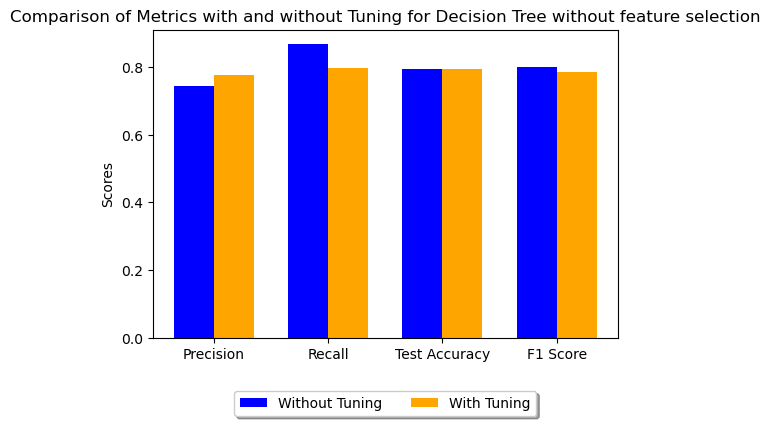

In [72]:
metrics = ['Precision', 'Recall', 'Test Accuracy', 'F1 Score']
dt_metrics_no_tuning = [precision_dt, recall_dt, accuracy_dt, f1_dt]
dt_metrics_with_tuning = [precision_dt_ht, recall_dt_ht, test_accuracy_dt_ht, f1_dt_ht]

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting bars for DT without tuning
bars1 = ax.bar(ind, dt_metrics_no_tuning, width, color='blue', label='Without Tuning')

# Plotting bars for DT with tuning
bars2 = ax.bar(ind + width, dt_metrics_with_tuning, width, color='orange', label='With Tuning')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics with and without Tuning for Decision Tree without feature selection')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)  # Move legend outside plot
plt.show()

#### Radar Chart

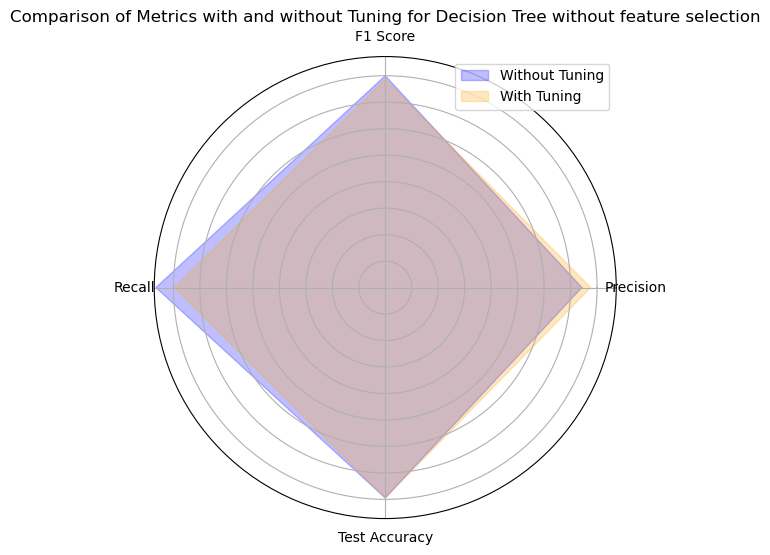

In [73]:
metrics = ['Precision', 'F1 Score', 'Recall', 'Test Accuracy']
dt_metrics_no_tuning = [precision_dt, f1_dt, recall_dt, accuracy_dt]
dt_metrics_with_tuning = [precision_dt_ht, f1_dt_ht, recall_dt_ht, test_accuracy_dt_ht]

# Define the number of metrics and the angles for the radar chart
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Repeat the first metric to close the circle
dt_metrics_no_tuning += dt_metrics_no_tuning[:1]
dt_metrics_with_tuning += dt_metrics_with_tuning[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, dt_metrics_no_tuning, color='blue', alpha=0.25, label='Without Tuning')
ax.fill(angles, dt_metrics_with_tuning, color='orange', alpha=0.25, label='With Tuning')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Comparison of Metrics with and without Tuning for Decision Tree without feature selection')
ax.legend(loc='upper right')  # Adjust legend position
plt.show()

### 3.2 Using resampled data with feature selection

In [97]:
X_train, X_testval, y_train, y_testval = train_test_split(selected_data, y_resampled, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.2, random_state=42)

In [98]:
dt_model_conf = DecisionTreeClassifier()
dt_model_conf.fit(X_train, y_train)

DecisionTreeClassifier()

#### 3.2.1 Checking Overfitting

In [99]:
#prediction with x_train
y_train_dt_conf = dt_model_conf.predict(X_train)

# prediction with x_val
y_val_dt_conf = dt_model_conf.predict(X_val)

# prediction with x_test
y_test_dt_conf = dt_model_conf.predict(X_test)

# training accuracy
train_accuracy_conf = accuracy_score(y_train,y_train_dt_conf)
print('Train accuracy:', train_accuracy_conf)

# validation accuracy
val_accuracy_conf = accuracy_score(y_val,y_val_dt_conf)
print('Valodation accuracy:', val_accuracy_conf)

# testing accuracy
test_accuracy_conf = accuracy_score(y_test,y_test_dt_conf)
print('Test accuracy:', test_accuracy_conf)

Train accuracy: 1.0
Valodation accuracy: 0.797979797979798
Test accuracy: 0.7873417721518987


In [100]:
accuracy_dt_conf = accuracy_score(y_test, y_test_dt)
precision_dt_conf = precision_score(y_test, y_test_dt)
recall_dt_conf = recall_score(y_test, y_test_dt)
f1_dt_conf = f1_score(y_test, y_test_dt)

print('Test accuracy =', accuracy_dt_conf)
print('Precision = ',precision_dt_conf)
print('Recall = ',recall_dt_conf)
print('f1_score = ',f1_dt_conf)

# Classification report
print("\nClassification Report on df:\n", classification_report(y_test, y_test_dt_conf))

Test accuracy = 0.7873417721518987
Precision =  0.7351598173515982
Recall =  0.8609625668449198
f1_score =  0.7931034482758621

Classification Report on df:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       208
           1       0.75      0.83      0.79       187

    accuracy                           0.79       395
   macro avg       0.79      0.79      0.79       395
weighted avg       0.79      0.79      0.79       395



We can see that model is overfitting beacause training score is very high and testing score is less. To overcome overfitting we do hyperparmeter tunning

#### 3.2.2 Hyper-parameter tuning

In [155]:
# Define the parameter grid
params = {
    "criterion": ["gini"],  # Using entropy criterion
    "splitter": ["best"],      # Using best splitter
    "max_depth": list(range(1, 6)),  # Reducing max depth
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(5, 20)),  # Increasing min samples per leaf
}


# Create the base Decision Tree classifier
tree_clf_conf = DecisionTreeClassifier(random_state=3)

# Perform GridSearchCV
tree_cv_conf = GridSearchCV(tree_clf_conf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv_conf.fit(X_train, y_train)

# Get the best parameters
best_params_conf = tree_cv_conf.best_params_
print(f"Best parameters: {best_params_conf}")

# Use the best parameters to create a new Decision Tree classifier
model_dt_conf_ht = DecisionTreeClassifier(**best_params_conf)
model_dt_conf_ht.fit(X_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=13)

In [156]:
# Make predictions
y_train_dt_conf_ht = model_dt_conf_ht.predict(X_train)
y_val_dt_conf_ht = model_dt_conf_ht.predict(X_val)
y_test_dt_conf_ht = model_dt_conf_ht.predict(X_test)

# Evaluate the model
train_accuracy_conf_ht = accuracy_score(y_train, y_train_dt_conf_ht)
val_accuracy_conf_ht = accuracy_score(y_val, y_val_dt_conf_ht)
test_accuracy_conf_ht = accuracy_score(y_test, y_test_dt_conf_ht)

precision_dt_conf_ht = precision_score(y_test, y_test_dt_conf_ht)
recall_dt_conf_ht = recall_score(y_test, y_test_dt_conf_ht)
f1_dt_conf_ht = f1_score(y_test, y_test_dt_conf_ht)

print("Train Accuracy:", train_accuracy_conf_ht)
print("Validation Accuracy:", val_accuracy_conf_ht)
print("Test Accuracy:", test_accuracy_conf_ht)
print()
print("Precision:", precision_dt_conf_ht)
print("Recall:", recall_dt_conf_ht)
print("F1 Score:", f1_dt_conf_ht)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_dt_conf_ht))

Train Accuracy: 0.7718052738336714
Validation Accuracy: 0.8181818181818182
Test Accuracy: 0.7569620253164557

Precision: 0.7570621468926554
Recall: 0.7165775401069518
F1 Score: 0.7362637362637361

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       208
           1       0.76      0.72      0.74       187

    accuracy                           0.76       395
   macro avg       0.76      0.75      0.76       395
weighted avg       0.76      0.76      0.76       395



#### 3.2.3 Visualization of Decision Tree (with feature selection) without and with Hyperparameter tuning

#### Difference between Train, Validation and Test accuracy of decision tree with and without hypermeter tuning

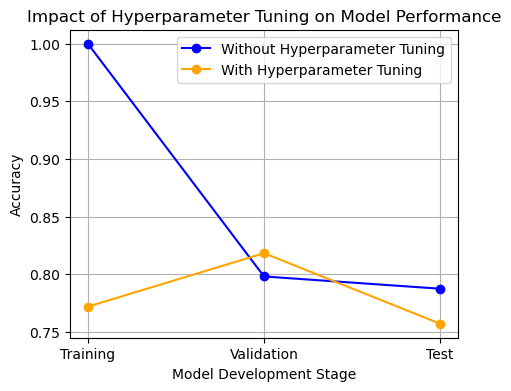

In [157]:
# Define the stages of model development
stages = ['Training', 'Validation', 'Test']

# Define the accuracy scores for decision tree without hyperparameter tuning
accuracy_no_tuning = [train_accuracy_conf, val_accuracy_conf, test_accuracy_conf]

# Define the accuracy scores for decision tree with hyperparameter tuning
accuracy_with_tuning = [train_accuracy_conf_ht, val_accuracy_conf_ht, test_accuracy_conf_ht]

# Define the x-axis labels
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']

# Plot the line plot
plt.figure(figsize=(5, 4))
plt.plot(stages, accuracy_no_tuning, marker='o', label='Without Hyperparameter Tuning', color='blue')
plt.plot(stages, accuracy_with_tuning, marker='o', label='With Hyperparameter Tuning', color='orange')
plt.xlabel('Model Development Stage')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Tuning on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

The significant reduction in train accuracy, from 1.0 to 0.7718, alongside a marginal increase in validation accuracy, indicates that the model's overfitting tendency has been effectively mitigated. While the test accuracy experienced a slight decline, the overall trend suggests improved generalization, as the model performs more consistently across unseen data. This adjustment strikes a better balance between bias and variance, enhancing the model's reliability in real-world scenarios.

In [81]:
data_dt_conf = {
    'Metric': ['Precision', 'Recall', 'Test Accuracy', 'F1 Score'],
    'Without Hyperparameter Tuning and Feature Selection': [precision_dt_conf, recall_dt_conf, accuracy_dt_conf, f1_dt_conf],
    'With Hyperparameter Tuning and Feature Selection': [precision_dt_conf_ht, recall_dt_conf_ht, test_accuracy_conf_ht, f1_dt_conf_ht]
}

metrics_df_dt_conf = pd.DataFrame(data_dt_conf)
metrics_df_dt_conf.set_index('Metric', inplace=True)
print(metrics_df_dt_conf)

               Without Hyperparameter Tuning and Feature Selection  \
Metric                                                               
Precision                                               0.743119     
Recall                                                  0.866310     
Test Accuracy                                           0.794937     
F1 Score                                                0.800000     

               With Hyperparameter Tuning and Feature Selection  
Metric                                                           
Precision                                              0.734300  
Recall                                                 0.812834  
Test Accuracy                                          0.772152  
F1 Score                                               0.771574  


#### Grouped Bar Chart

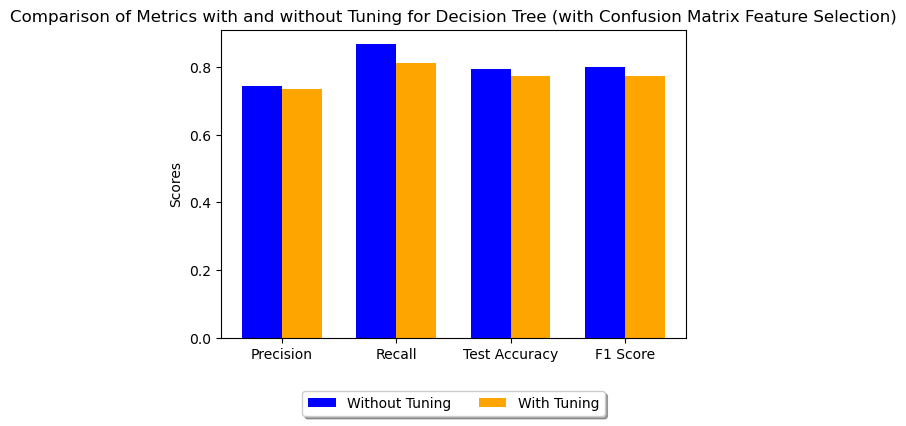

In [82]:
metrics = ['Precision', 'Recall', 'Test Accuracy', 'F1 Score']
dt_metrics_no_tuning_conf = [precision_dt_conf, recall_dt_conf, accuracy_dt_conf, f1_dt_conf]
dt_metrics_with_tuning_conf = [precision_dt_conf_ht, recall_dt_conf_ht, test_accuracy_conf_ht, f1_dt_conf_ht]

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting bars for DT with feature selection and without tuning
bars1 = ax.bar(ind, dt_metrics_no_tuning_conf, width, color='blue', label='Without Tuning')

# Plotting bars for DT with feature selection and with tuning
bars2 = ax.bar(ind + width, dt_metrics_with_tuning_conf, width, color='orange', label='With Tuning')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics with and without Tuning for Decision Tree (with Confusion Matrix Feature Selection)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)  # Move legend outside plot
plt.show()

#### Radar Chart

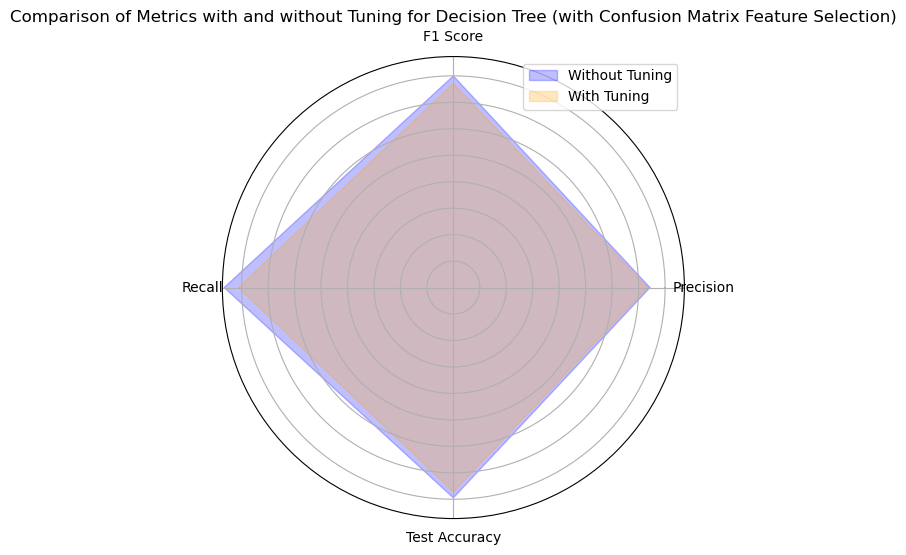

In [83]:
metrics = ['Precision', 'F1 Score', 'Recall', 'Test Accuracy']
dt_metrics_no_tuning_conf = [precision_dt_conf, f1_dt_conf, recall_dt_conf, accuracy_dt_conf]
dt_metrics_with_tuning_conf = [precision_dt_conf_ht, f1_dt_conf_ht, recall_dt_conf_ht, test_accuracy_conf_ht]

# Define the number of metrics and the angles for the radar chart
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Repeat the first metric to close the circle
dt_metrics_no_tuning_conf += dt_metrics_no_tuning_conf[:1]
dt_metrics_with_tuning_conf += dt_metrics_with_tuning_conf[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, dt_metrics_no_tuning_conf, color='blue', alpha=0.25, label='Without Tuning')
ax.fill(angles, dt_metrics_with_tuning_conf, color='orange', alpha=0.25, label='With Tuning')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Comparison of Metrics with and without Tuning for Decision Tree (with Confusion Matrix Feature Selection)')
ax.legend(loc='upper right')  # Adjust legend position
plt.show()

### 3.3 Visualization

In both cases, we selected Hypertuned decision tree

In [84]:
data_dt_ht = {
    'Metric': ['Precision', 'Recall', 'Test Accuracy', 'F1 Score'],
    'With Feature Selection': [precision_dt_ht, recall_dt_ht, test_accuracy_dt_ht, f1_dt_ht],
    'Without Feature Selection': [precision_dt_conf_ht, recall_dt_conf_ht, test_accuracy_conf_ht, f1_dt_conf_ht]
}

metrics_df_dt_ht = pd.DataFrame(data_dt_ht)
metrics_df_dt_ht.set_index('Metric', inplace=True)
print(metrics_df_dt_ht)

               With Feature Selection  Without Feature Selection
Metric                                                          
Precision                    0.776042                   0.734300
Recall                       0.796791                   0.812834
Test Accuracy                0.794937                   0.772152
F1 Score                     0.786280                   0.771574


#### 3.3.1 Grouped Bar Chart

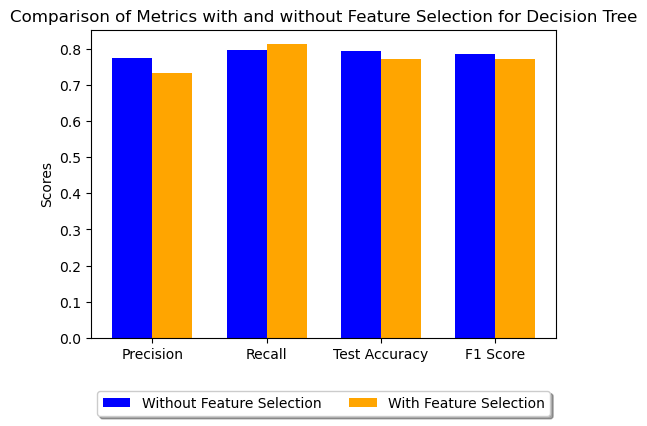

In [85]:
metrics = ['Precision', 'Recall', 'Test Accuracy', 'F1 Score']
dt_metrics_no_feature = [precision_dt_ht, recall_dt_ht, test_accuracy_dt_ht, f1_dt_ht]
dt_metrics_with_feature = [precision_dt_conf_ht, recall_dt_conf_ht, test_accuracy_conf_ht, f1_dt_conf_ht]

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting bars for DT without feature selection
bars1 = ax.bar(ind, dt_metrics_no_feature, width, color='blue', label='Without Feature Selection')

# Plotting bars for DT with feature selection
bars2 = ax.bar(ind + width, dt_metrics_with_feature, width, color='orange', label='With Feature Selection')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics with and without Feature Selection for Decision Tree')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)  # Move legend outside plot
plt.show()

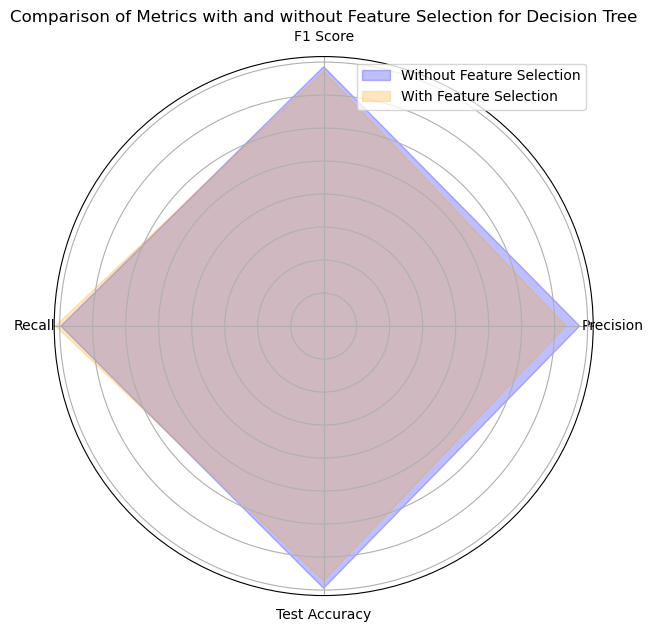

In [86]:
metrics = ['Precision', 'F1 Score', 'Recall', 'Test Accuracy']
dt_metrics_no_feature = [precision_dt_ht, f1_dt_ht, recall_dt_ht, test_accuracy_dt_ht]
dt_metrics_with_feature = [precision_dt_conf_ht, f1_dt_conf_ht, recall_dt_conf_ht, test_accuracy_conf_ht]

# Define the number of metrics and the angles for the radar chart
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Repeat the first metric to close the circle
dt_metrics_no_feature += dt_metrics_no_feature[:1]
dt_metrics_with_feature += dt_metrics_with_feature[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.fill(angles, dt_metrics_no_feature, color='blue', alpha=0.25, label='Without Feature Selection')
ax.fill(angles, dt_metrics_with_feature, color='orange', alpha=0.25, label='With Feature Selection')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Comparison of Metrics with and without Feature Selection for Decision Tree')
ax.legend(loc='upper right')  # Adjust legend position
plt.show()

Based on the results, test accuracy and f1 score of Decision tree(Hyperparameter Tuning) on resampled dataset without feature selection through confusion matrix is slightly better. Thus, in case of Random Forest model we are selecting resampled dataset without feature selection.

# Comparision of Best Perfroming Models

In [189]:
data_final = {
    'Model': ['Logistic Regression', 'Random Forest (with FS)', 'Decision Tree (with HT)'],
    'Precision': [precision_lr, precision_rf_conf, precision_dt_ht],
    'Recall': [recall_lr, recall_rf_conf, recall_dt_ht],
    'F1 Score': [f1_lr, f1_rf_conf, f1_dt_ht],
    'Test Accuracy': [accuracy_lr, accuracy_rf_conf, test_accuracy_dt_ht]
}

metrics_final = pd.DataFrame(data_final)
metrics_final.set_index('Model', inplace=True)
print(metrics_final)

                         Precision    Recall  F1 Score  Test Accuracy
Model                                                                
Logistic Regression       0.751244  0.807487  0.778351       0.782278
Random Forest (with FS)   0.877660  0.882353  0.880000       0.886076
Decision Tree (with HT)   0.729592  0.764706  0.746736       0.754430


### Bar Graphs

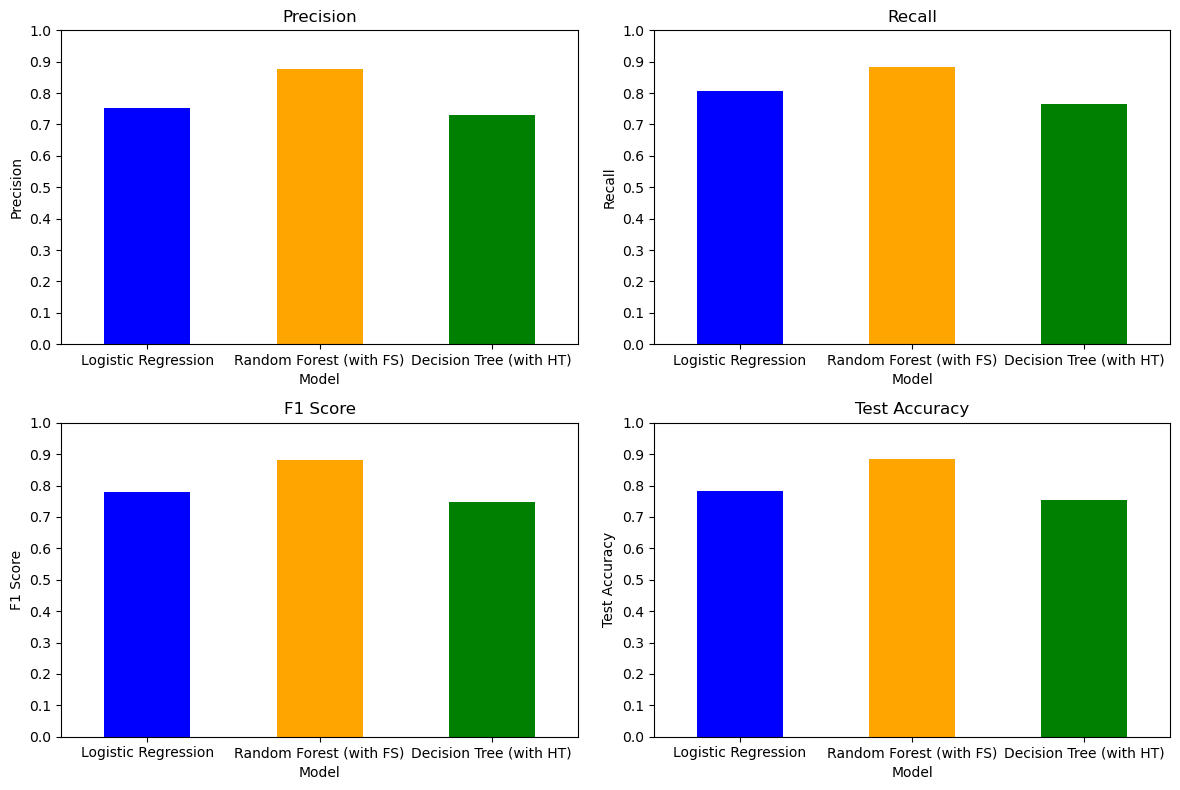

In [190]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, metric in enumerate(['Precision', 'Recall', 'F1 Score', 'Test Accuracy']):
    ax = axes[i//2, i%2]
    bars = metrics_final[metric].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green'])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(metrics_final.index, rotation=0)
    ax.set_xlim(-0.5, len(metrics_final) - 0.5)  # Adjust x-axis limits
    ax.margins(y=0.15)  # Increase the margin on the y-axis
    ax.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

plt.tight_layout()
plt.show()

### Radar Chart

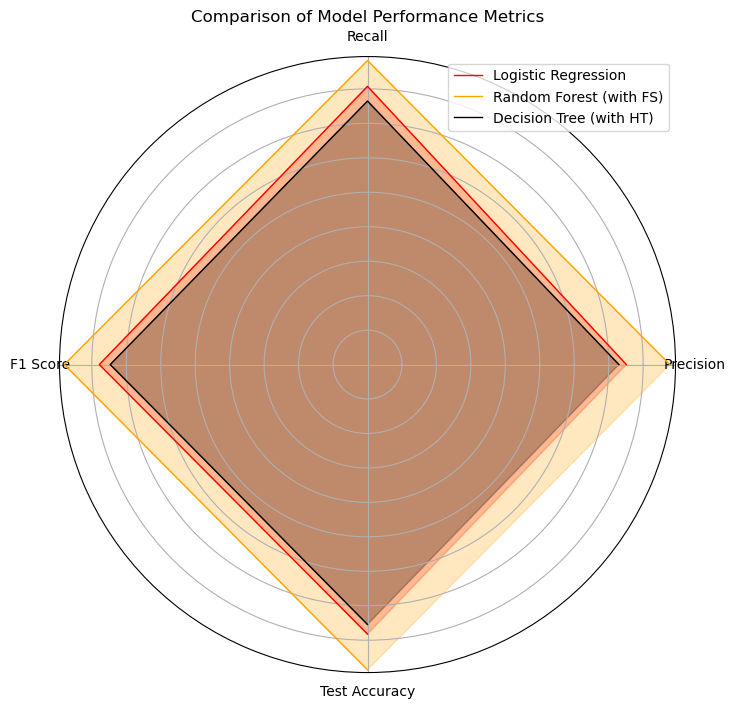

In [191]:
# Convert data to DataFrame
df = pd.DataFrame(data_final)

# Define the number of metrics and the angles for the radar chart
metrics = ['Precision', 'Recall', 'F1 Score', 'Test Accuracy']
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Define the colors for each model
colors = ['red', 'orange', 'black']

# Create radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, model in enumerate(data_final['Model']):
    values = df.iloc[i, 1:].values.tolist()
    ax.plot(angles, values, linewidth=1, linestyle='solid', color=colors[i], label=model)
    ax.fill(angles, values, alpha=0.25, color=colors[i])
ax.set_yticklabels([])
ax.set_xticks(angles)  # Set the number of tick locations to match the number of labels
ax.set_xticklabels(metrics)
ax.set_title('Comparison of Model Performance Metrics')
ax.legend(loc='upper right')
plt.show()


Logistic Regression demonstrated a competitive performance, striking a good balance between precision (0.751) and recall (0.807). This suggests that LR effectively identified positive cases while minimizing false positives, resulting in a reasonable F1-score of 0.778 and a test accuracy of 0.782.

Random Forest achieved the highest accuracy (0.886), but its precision (0.878) and recall (0.882) were slightly lower compared to LR. Although RF excelled in overall accuracy, it struggled with identifying true positive cases, leading to a marginally lower F1-score of 0.880.

Decision Tree, on the other hand, exhibited the lowest performance among the models, with precision, recall, and F1-score of 0.72, 0.86, and 0.74, respectively. This indicates that DT had difficulty correctly identifying employees who would leave the company, resulting in a test accuracy of 0.75.

Based on the results, Random forest with feature selection has best accuracy and f1 score of 0.880 and 0.886.

# Conclusion:

In our project, we went through a lot to build models that predict whether employees will leave a company or not. We began by perfroming **Label Encoding** and then addressing **class imbalance** through **OverSampling** in our dataset through resampling techniques, ensuring that our models could learn from both classes effectively. Next, we experimented with **feature selection** methods, comparing the effectiveness of **chi-square** and **confusion matrix-based approaches**. After careful evaluation, **we opted for the confusion matrix** method due to its superior performance in capturing relevant features. We worked hard to make sure our data was in good shape and picked the right features to use in our models. Our goal was to make accurate predictions while avoiding mistakes like overfitting, where the model learns too much from the training data and performs poorly on new data.

Following feature selection, we fine-tuned various machine learning algorithms, including logistic regression, decision trees, and random forests. We evaluated each model's performance using metrics like **accuracy, precision, recall, and F1-score**, striving to strike a balance between model complexity and predictive accuracy. During each Train-test split, we chose a separate **validation set** to ensure unbiased evaluation.

After all the testing and tinkering, we found out that **Logistic Regression** balanced precision and recall well, achieving a competitive F1-score and accuracy. Random Forest had the highest accuracy but struggled with precision and recall, resulting in an F1-score of 0.880. **Decision Tree with Hyperparameter Tuning** performed the poorest, with lowest F1-score and accuracy. Considering their performance, it's advisable to proceed with either RF or LR for predicting employee attrition, with further optimization potential

We have selected the **Random Forest model with feature selection** through the confusion matrix as the best-performing model for predicting employee attrition. It acheived **F1-score** of **0.880** and an **accuracy** of **0.886**. This model addresses the problem of employee attrition prediction by leveraging the strengths of ensemble learning and feature selection. Random Forests excel in handling high-dimensional data and capturing complex interactions between features, making them well-suited for our dataset with numerous predictor variables. Additionally, by incorporating feature selection techniques such as the confusion matrix, we ensured that the model focuses on the most relevant features, enhancing interpretability and reducing the risk of overfitting. Overall, the Random Forest model offers a robust solution that can effectively identify employees at risk of attrition, enabling proactive intervention strategies for HR professionals.

In terms of novelty and innovation, our project stands out in several aspects. Firstly, we applied a comprehensive approach to address the challenge of employee attrition prediction, combining techniques such as resampling, feature selection, and ensemble learning. By systematically evaluating multiple models and methodologies, we aimed to identify the most effective strategies for predicting attrition while mitigating common pitfalls such as class imbalance and overfitting. Additionally, our emphasis on feature selection through the confusion matrix represents a novel approach to identifying relevant predictors, offering a fresh perspective compared to traditional methods. Overall, our project showcases innovative techniques and a thorough analytical process, contributing to advancements in predictive modeling for employee retention.

Further optimization and fine-tuning of these models could potentially enhance their performance and make them even more effective in practical deployment. Overall, our project demonstrates the importance of methodical experimentation and rigorous evaluation in building reliable predictive models for real-world applications.